In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.colorcodes=True

from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.decomposition import PCA


## Part ONE

PROJECT OBJECTIVE: Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’

1. Import and warehouse data:

• Import all the given datasets and explore shape and size. 

• Merge all datasets onto one and explore final shape and size.

• Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

• Import the data from above steps into python.


In [2]:
df_1 = pd.read_csv("Part1 - Car name.csv")

In [3]:
df_1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [4]:
df_2 = pd.read_json('Part1 - Car-Attributes.json')

In [5]:
df_2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
print("Dataframe 1 shape:",df_1.shape)
print("Dataframe 2 shape:",df_2.shape)

Dataframe 1 shape: (398, 1)
Dataframe 2 shape: (398, 8)


Here both the 2 data frames have the same number of records. 
dataframe 2 doesnt have the car name info. Both dataframes must be merged to make it a complete data.

In [7]:
df_car = pd.concat([df_1,df_2], axis=1)

In [8]:
df_car.shape

(398, 9)

In [9]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


df_car is the concatenated/merged data of the 2 given files: Part1 - Car name.csv & Part1 - Car-Attributes.json

Exporting the df_car as .csv, .json, .txt to the local machine 

**write as .csv**

In [10]:
df_car.to_csv('Export_df_car_withindex.csv')
df_car.to_csv('Export_df_car_woindex.csv', index=False)  #without index

**write as .json**

In [11]:
df_car.to_json(r'Export_df_car.json')

**write as .txt**

In [12]:
df_car.to_csv('Export_df_car_withindex.txt', sep='\t')
df_car.to_csv('Export_df_car_woindex.txt', sep='\t', index=False)

**Importing the just now exported files back into python**

In [13]:
df_car_csv_imprt = pd.read_csv('Export_df_car_woindex.csv')  
df_car_json_imprt = pd.read_json('Export_df_car.json')
df_car_txt_imprt = np.loadtxt('Export_df_car_woindex.txt', delimiter='\t', dtype=str)

In [14]:
df_car_csv_imprt.head()   #csv import

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [15]:
df_car_json_imprt.head()    #json import

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [16]:
print(df_car_txt_imprt)    #txt import

[['car_name' 'mpg' 'cyl' ... 'acc' 'yr' 'origin']
 ['chevrolet chevelle malibu' '18.0' '8' ... '12.0' '70' '1']
 ['buick skylark 320' '15.0' '8' ... '11.5' '70' '1']
 ...
 ['dodge rampage' '32.0' '4' ... '11.6' '82' '1']
 ['ford ranger' '28.0' '4' ... '18.6' '82' '1']
 ['chevy s-10' '31.0' '4' ... '19.4' '82' '1']]


--

**2. Data cleansing:**
    
• Missing/incorrect value treatment

• Drop attribute/s if required using relevant functional knowledge

• Perform another kind of corrections/treatment on the data.


In [17]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


check if there are any nulls

In [18]:
df_car.isnull().any()

car_name    False
mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
dtype: bool

hp 'Horsepower' column is shown object.  There must be some sort of issues going on. 

In [19]:
df_car['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

We can notice a "?" present in the data. 

In [20]:
df_car[df_car.hp == '?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


The above listed 6 records are having ?; these records need to be handled. Excluding these 6 records. 

In [21]:
df_car = df_car[df_car.hp != '?']

In [22]:
df_car.shape   #6 records have been removed now. 

(392, 9)

In [23]:
df_car['hp'] = df_car['hp'].astype(int)

In [24]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    int32  
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


Now the hp is converted to int.

In [25]:
df_car.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [26]:
df_car.car_name.unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'ford torino 500', 'amc matador',
       'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900', 'peugeot 304

The car name is not going to be of much help, sine there are many different car brands in this dataset. Having all these different car names will keep the data granualarity very low. 
The problem in hand is about clustering, hence dropping the car_name column from the data. 

In [27]:
df_car = df_car.drop('car_name', axis=1)

In [28]:
df_car['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [29]:
df_car['origin'] = df_car.origin.replace([1,2,3],['USA','Europe','Japan'])  #From the data analysis, we can see that the countries the data belong to and updating the origin. 

In [30]:
df_car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,USA
1,15.0,8,350.0,165,3693,11.5,70,USA
2,18.0,8,318.0,150,3436,11.0,70,USA
3,16.0,8,304.0,150,3433,12.0,70,USA
4,17.0,8,302.0,140,3449,10.5,70,USA


In [31]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   disp    392 non-null    float64
 3   hp      392 non-null    int32  
 4   wt      392 non-null    int64  
 5   acc     392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    object 
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 26.0+ KB


Additional data correction/imputation can be done as needed based on the detailed EDA in the following steps.

**3. Data analysis & visualisation:**
    
• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create 
your own features if required. Be highly experimental and analytical here to find hidden patterns

In [32]:
df_car.describe()

,mpg,cyl,disp,hp,wt,acc,yr
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [33]:
df_car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,USA
1,15.0,8,350.0,165,3693,11.5,70,USA
2,18.0,8,318.0,150,3436,11.0,70,USA
3,16.0,8,304.0,150,3433,12.0,70,USA
4,17.0,8,302.0,140,3449,10.5,70,USA


In the df_car dataset, below are the categorical & numerical data. 
**categorical data**: cyl, yr, origin
**Numerical data**: mpg, disp, hp, wt, acc

Plotting the distribution for MPG 

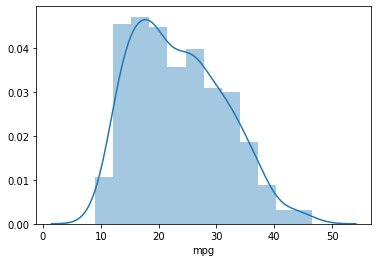

In [34]:
sns.distplot(df_car['mpg'])

Observation on **mpg**: min value is 9 and max is 46, but on average it is 23.44 with a variation i.e. std deviation of 7.8

Since we will be applying a classifier based on distance, applying standardization on the numerical data

 **Multivariate analysis** - Plotting all the columns of df_car  

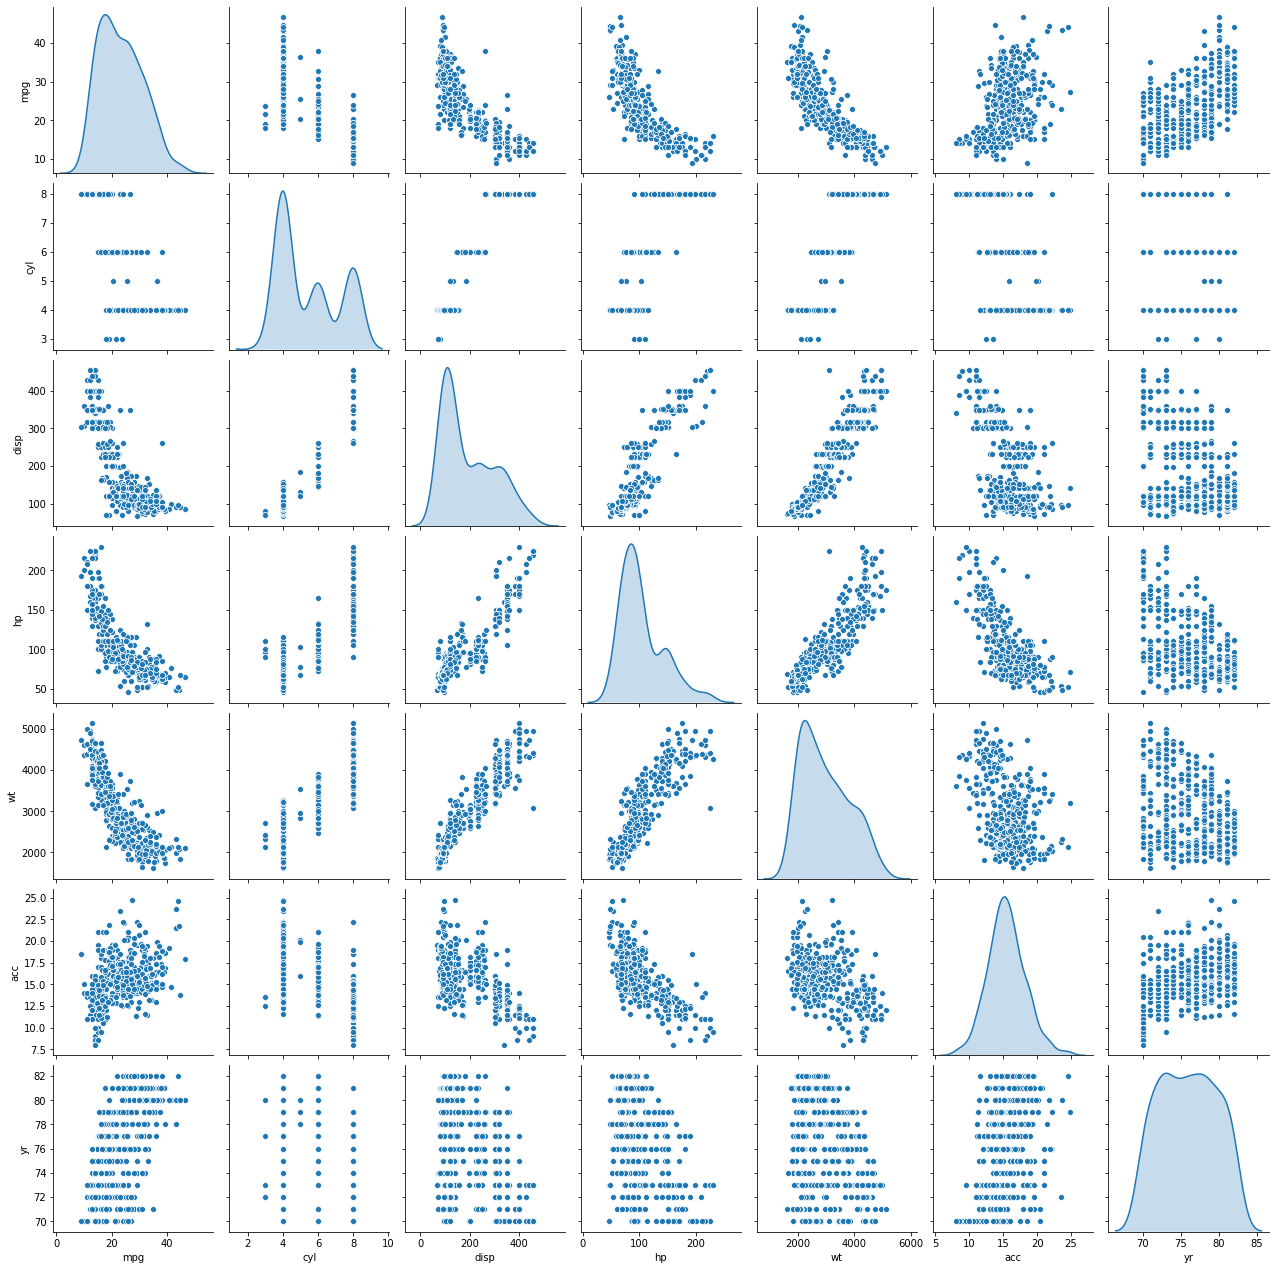

In [35]:
sns.pairplot(df_car,diag_kind='kde');

Text(0.5, 1.0, 'Distribution of origin')

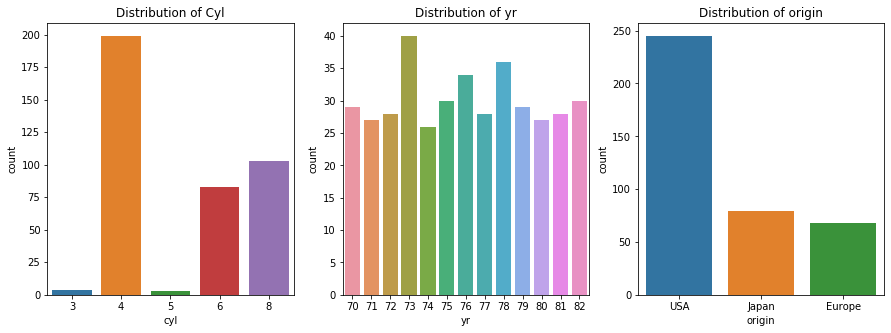

In [36]:
#Distribution of all the Categorical data - cyl, yr & origin. 

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,3), (0, 0))
sns.countplot(df_car['cyl']).set_title('Distribution of Cyl')
#
ax2 = plt.subplot2grid((1,3), (0, 1))
sns.countplot(df_car['yr']).set_title('Distribution of yr')
#
ax2 = plt.subplot2grid((1,3), (0, 2))
sns.countplot(df_car['origin']).set_title('Distribution of origin')
#

**Observation:** 
1) There are More cars that are American make.  

2) The number of cars based on the year manufactured is about the same range for most years, with most number of cars from 74, followed by 78

3) There are more cars that are 4 cylinder cars. 


Text(0.5, 1.0, 'Distribution of acc')

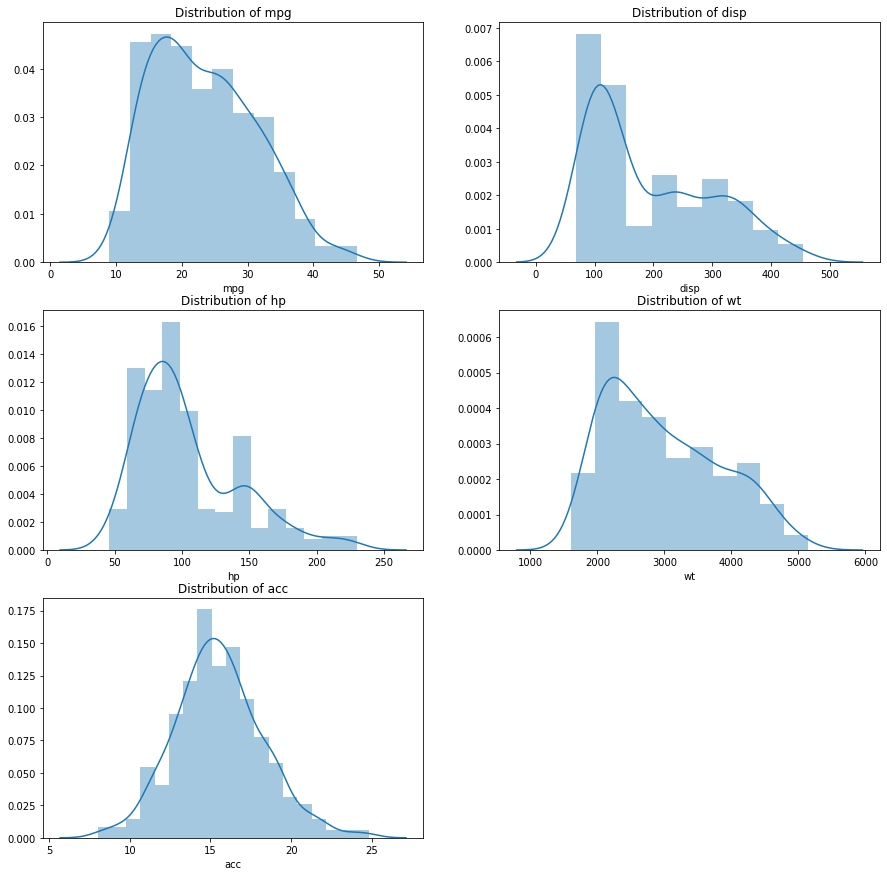

In [37]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2), (0, 0))
sns.distplot(df_car['mpg']).set_title('Distribution of mpg')
#
ax2 = plt.subplot2grid((3,2), (0, 1))
sns.distplot(df_car['disp']).set_title('Distribution of disp')
#
ax3 = plt.subplot2grid((3,2), (1, 0))
sns.distplot(df_car['hp']).set_title('Distribution of hp')
#
ax4 = plt.subplot2grid((3,2), (1, 1))
sns.distplot(df_car['wt']).set_title('Distribution of wt')
#
ax5 = plt.subplot2grid((3,2), (2, 0))
sns.distplot(df_car['acc']).set_title('Distribution of acc')
#

**observation:**

1) acc is normally distributed. no major abnormality found.

2) mpg, disp, hp, wt all are slightly right skewed. 


**Bi-variate analysis**

since mpg column is the primary column, looking for the distribution for different features w.r.t mpg

Text(0.5, 1.0, 'mpg based on car manufacturer country')

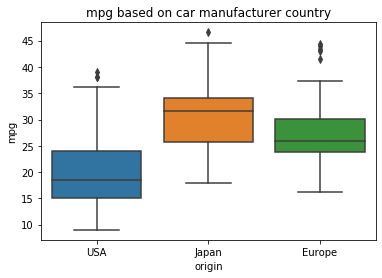

In [38]:
sns.boxplot(df_car['origin'], df_car['mpg']).set_title("mpg based on car manufacturer country")

**observation**: USA Country make cars are performing poorly w.r.t mpg compared to Japan and Europe. Japan cars has the best mpg. 

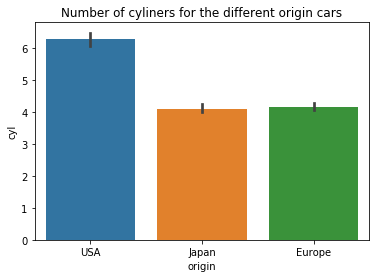

In [39]:
sns.barplot(df_car['origin'], df_car['cyl']).set_title("Number of cyliners for the different origin cars");

**Observation:** USA cars seems to have more no. of cyl while Japan & European cars are mostly 4 cyl. This explains the mpg behavior for these origin cars.

In [40]:
df_car['yr'].value_counts()

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: yr, dtype: int64

Text(0.5, 1.0, 'mpg based on car make year')

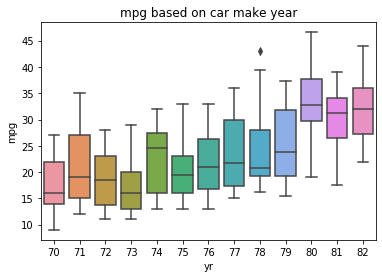

In [41]:
sns.boxplot( df_car['yr'],df_car['mpg']).set_title("mpg based on car make year")

**observation**: Cars manufactured in the recent years have a better mpg i.e. newer cars have better mpg compared to older cars. 
    

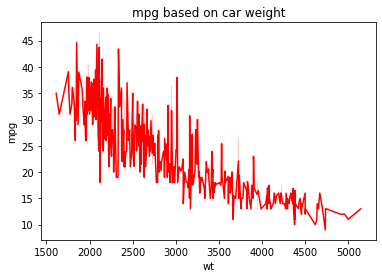

In [42]:
sns.lineplot( df_car['wt'],df_car['mpg'], color='r').set_title("mpg based on car weight");

**observation**: car weight is indirectly proportional to the mpg. i.e. lighter cars have better mpg and heavier cars have poor mpg.

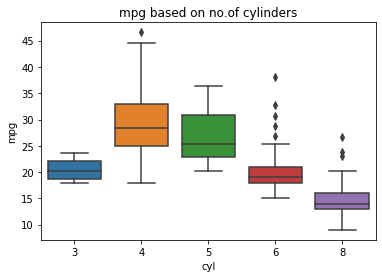

In [43]:
sns.boxplot( df_car['cyl'],df_car['mpg']).set_title("mpg based on no.of cylinders");

**observation**: 4 cylinder cars seems to have better mpg than other cars. General observation is that as the no.of cylinders increase, the mpg performance decrease. 

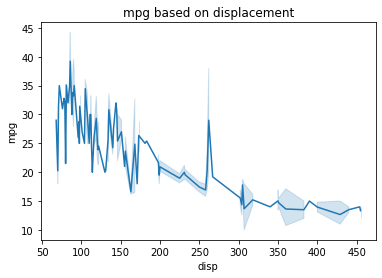

In [44]:
sns.lineplot( df_car['disp'],df_car['mpg']).set_title("mpg based on displacement");

**observation**: Displacement and mpg performance are inversly proportional

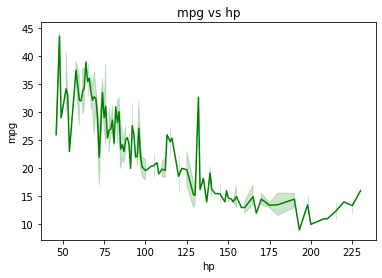

In [45]:
sns.lineplot( df_car['hp'],df_car['mpg'], color='g').set_title("mpg vs hp");

**observation**: hp and mpg performance are inversly proportional

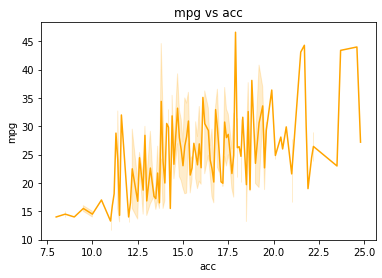

In [46]:
sns.lineplot( df_car['acc'],df_car['mpg'], color='orange').set_title("mpg vs acc");

**observation**: As a general observation, acceleration and mpg performance are linear.

In [47]:
corr=df_car.corr()

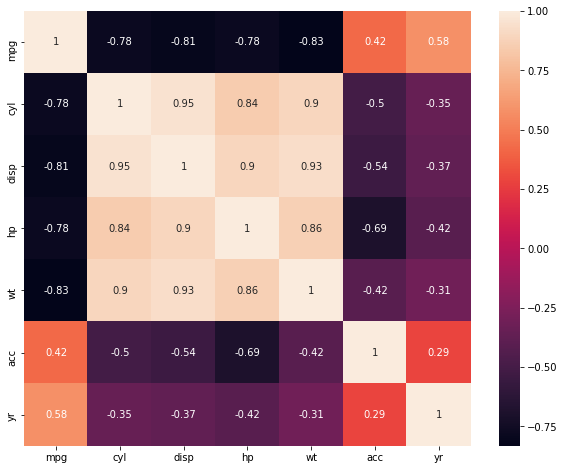

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True);

In [49]:
df_car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,USA
1,15.0,8,350.0,165,3693,11.5,70,USA
2,18.0,8,318.0,150,3436,11.0,70,USA
3,16.0,8,304.0,150,3433,12.0,70,USA
4,17.0,8,302.0,140,3449,10.5,70,USA


**4. Machine learning:**
  
  
• Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data. 

• Share your insights about the difference in using these two methods

In [50]:
df_cls = df_car.iloc[:,0:7]  ##Keeping only the numerical data for further clustering processes

In [51]:
df_cls.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


## K-Means Clustering

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Since the problem hand involves measurements using distance, it is best to scale/standarize the data. 

In [53]:
from scipy.stats import zscore

In [54]:
df_cls_z = df_cls.apply(zscore)

In [55]:
df_cls_z.head()   #Before zscore and after zscore differneces can be noticed with the above output. 

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315


In [56]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
KMinertia=[]

for k in clusters:
    Kmodel=KMeans(n_clusters=k)
    Kmodel.fit(df_cls_z)
    prediction=Kmodel.predict(df_cls_z)
    meanDistortions.append(sum(np.min(cdist(df_cls_z, Kmodel.cluster_centers_, 'euclidean'), axis=1)) / df_cls_z
                           .shape[0])
    KMinertia.append(Kmodel.inertia_)

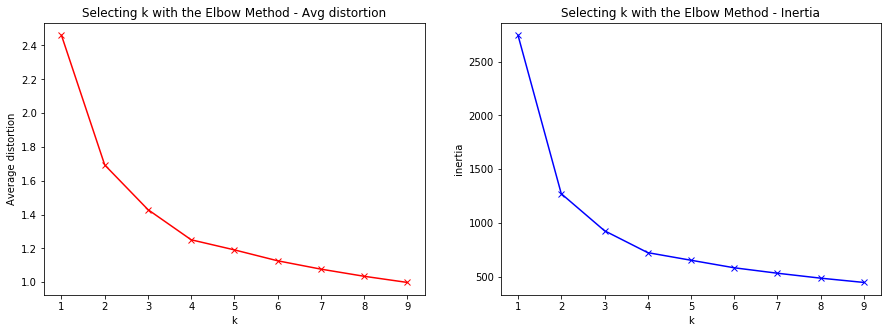

In [57]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2), (0, 0))
plt.plot(clusters, meanDistortions, 'bx-', color='red')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method - Avg distortion')
#
ax2 = plt.subplot2grid((1,2), (0, 1))
plt.plot(clusters, KMinertia, 'bx-', color='blue')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Selecting k with the Elbow Method - Inertia');
#

When k=2, the elbow is prominent. Hence going with 2. 

In [58]:
#Set the value of k=3
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2345)

In [59]:
kmeans.fit(df_cls_z)

KMeans(n_clusters=2, n_init=15, random_state=2345)

In [60]:
labels = kmeans.labels_

### Centroids

In [61]:
##Centroids for 2 clusters

In [62]:
centroids = kmeans.cluster_centers_

In [63]:
centroids

array([[ 0.41155842, -0.53241561, -0.52333952, -0.51221122, -0.48933748,
         0.35633727,  0.23062525],
       [-1.09620701,  1.41811635,  1.39394172,  1.36430091,  1.30337552,
        -0.94912263, -0.6142822 ]])

In [64]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(df_cls_z))

In [65]:
centroid_df

,mpg,cyl,disp,hp,wt,acc,yr
0,0.411558,-0.532416,-0.523340,-0.512211,-0.489337,0.356337,0.230625
1,-1.096207,1.418116,1.393942,1.364301,1.303376,-0.949123,-0.614282


### silhouette_score

In [66]:
# silhouette_score
silhouette_score(df_cls_z,labels)

0.4781414730966848

Inorder to validate/check if 2 clusters are ideal here, checking the silhoutte score for different clusters.  

In [67]:
df_cls_z.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315


In [68]:
#calculating silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 7,
   "max_iter": 900,
   "random_state": 2345,
}

In [69]:
silhouette_coeff = []

In [70]:
for k in range(2, 10):   ##Here range starts from 2 for silhoutte coeff
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_cls_z)
    score = silhouette_score(df_cls_z,kmeans.labels_)
    silhouette_coeff.append(score)

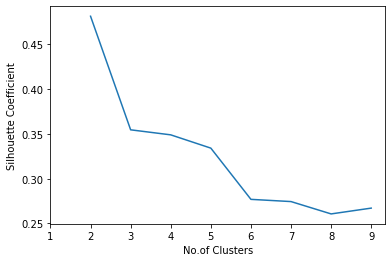

In [71]:
plt.plot(range(2, 10), silhouette_coeff)
plt.xticks(range(1,10))
plt.xlabel("No.of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

For no. of clusters = 2, the silhoutte coeff is higher. 

Adding the new cluster label to the original datasets. 

In [72]:
df_cls_z["KMeans_cluster"] = labels
df_cls['KMeans_cluster']=labels

In [73]:
df_car['KMeans_cluster']=labels

In [74]:
df_cls_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             392 non-null    float64
 1   cyl             392 non-null    float64
 2   disp            392 non-null    float64
 3   hp              392 non-null    float64
 4   wt              392 non-null    float64
 5   acc             392 non-null    float64
 6   yr              392 non-null    float64
 7   KMeans_cluster  392 non-null    int32  
dtypes: float64(7), int32(1)
memory usage: 36.0 KB


In [75]:
df_cls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             392 non-null    float64
 1   cyl             392 non-null    int64  
 2   disp            392 non-null    float64
 3   hp              392 non-null    int32  
 4   wt              392 non-null    int64  
 5   acc             392 non-null    float64
 6   yr              392 non-null    int64  
 7   KMeans_cluster  392 non-null    int32  
dtypes: float64(3), int32(2), int64(3)
memory usage: 34.5 KB


In [76]:
#Data profiling based on the new cluster. 

In [77]:
df_cls.KMeans_cluster.value_counts()

0    285
1    107
Name: KMeans_cluster, dtype: int64

In [78]:
df_cls.head()

,mpg,cyl,disp,hp,wt,acc,yr,KMeans_cluster
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [79]:
grpby = df_cls.groupby('KMeans_cluster').mean()

In [80]:
grpby

,mpg,cyl,disp,hp,wt,acc,yr
KMeans_cluster,,,,,,,
0,26.654035,4.564912,139.717544,84.778947,2562.470175,16.523158,76.828070
1,14.900935,7.887850,340.093458,156.915888,4083.261682,12.926168,73.719626


On a High level, the below distribution explains the 2 clusters. Cluster 1 seems to be the Heavily built, muscle cars
where as Cluster 0 seems to be the mpg efficient lighter cars. 

**Visualizing the data with the new KMeans clusters**

Text(0.5, 1.0, 'Visualizing new clusters based on mpg Vs yr')

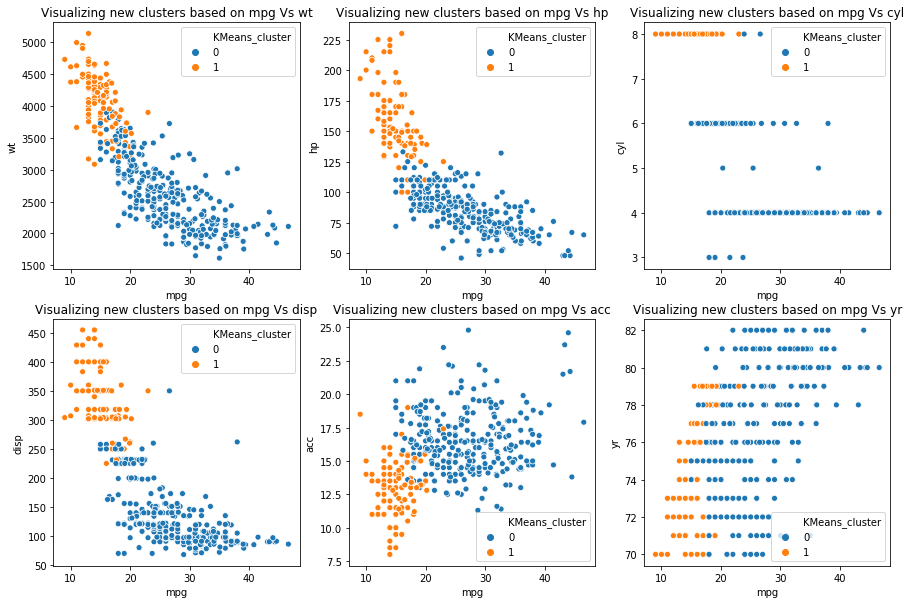

In [81]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,3), (0, 0))
sns.scatterplot(x="mpg", y="wt", hue="KMeans_cluster",data=df_cls).set_title('Visualizing new clusters based on mpg Vs wt')
#
ax2 = plt.subplot2grid((2,3), (0, 1))
sns.scatterplot(x="mpg", y="hp", hue="KMeans_cluster",data=df_cls).set_title('Visualizing new clusters based on mpg Vs hp')
#
ax3 = plt.subplot2grid((2,3), (0, 2))
sns.scatterplot(x="mpg", y="cyl", hue="KMeans_cluster",data=df_cls).set_title('Visualizing new clusters based on mpg Vs cyl')
#
ax4 = plt.subplot2grid((2,3), (1, 0))
sns.scatterplot(x="mpg", y="disp", hue="KMeans_cluster",data=df_cls).set_title('Visualizing new clusters based on mpg Vs disp')
#
ax5 = plt.subplot2grid((2,3), (1, 1))
sns.scatterplot(x="mpg", y="acc", hue="KMeans_cluster",data=df_cls).set_title('Visualizing new clusters based on mpg Vs acc')
#
ax5 = plt.subplot2grid((2,3), (1, 2))
sns.scatterplot(x="mpg", y="yr", hue="KMeans_cluster",data=df_cls).set_title('Visualizing new clusters based on mpg Vs yr')
#


Based on the distributions, the cluster 1 and 0 is clearly distinguishable & can be explained at a high level as below: 

**Cluster 1**: mgp: <15, no.of cyl>6, disp >250, hp>100, wt>3000

**Cluster 0**: mgp: >26, no.of cyl<5, disp <250, hp<100, wt<3000          

## Hierarchial Clustering 

In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [83]:
df_cls_H = df_car.iloc[:,0:7]  #Keeping only the required column & excluding the KClustering label that was added in the prev step. 

In [84]:
df_cls_H.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [85]:
df_cls_H_z = df_cls_H.apply(zscore)

In [86]:
df_cls_H_z.head()  ##Z score applied. 

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315


In [87]:
#Pairwise distance 
link_method = linkage(df_cls_H_z, method = 'average')

In [88]:
link_method

array([[2.64000000e+02, 2.77000000e+02, 7.73781923e-02, 2.00000000e+00],
       [3.49000000e+02, 3.50000000e+02, 1.22195135e-01, 2.00000000e+00],
       [3.45000000e+02, 3.47000000e+02, 1.49428116e-01, 2.00000000e+00],
       ...,
       [7.78000000e+02, 7.79000000e+02, 3.08687535e+00, 2.89000000e+02],
       [7.22000000e+02, 7.80000000e+02, 3.97998931e+00, 2.93000000e+02],
       [7.77000000e+02, 7.81000000e+02, 4.85371370e+00, 3.92000000e+02]])

Plotting the Dendograms

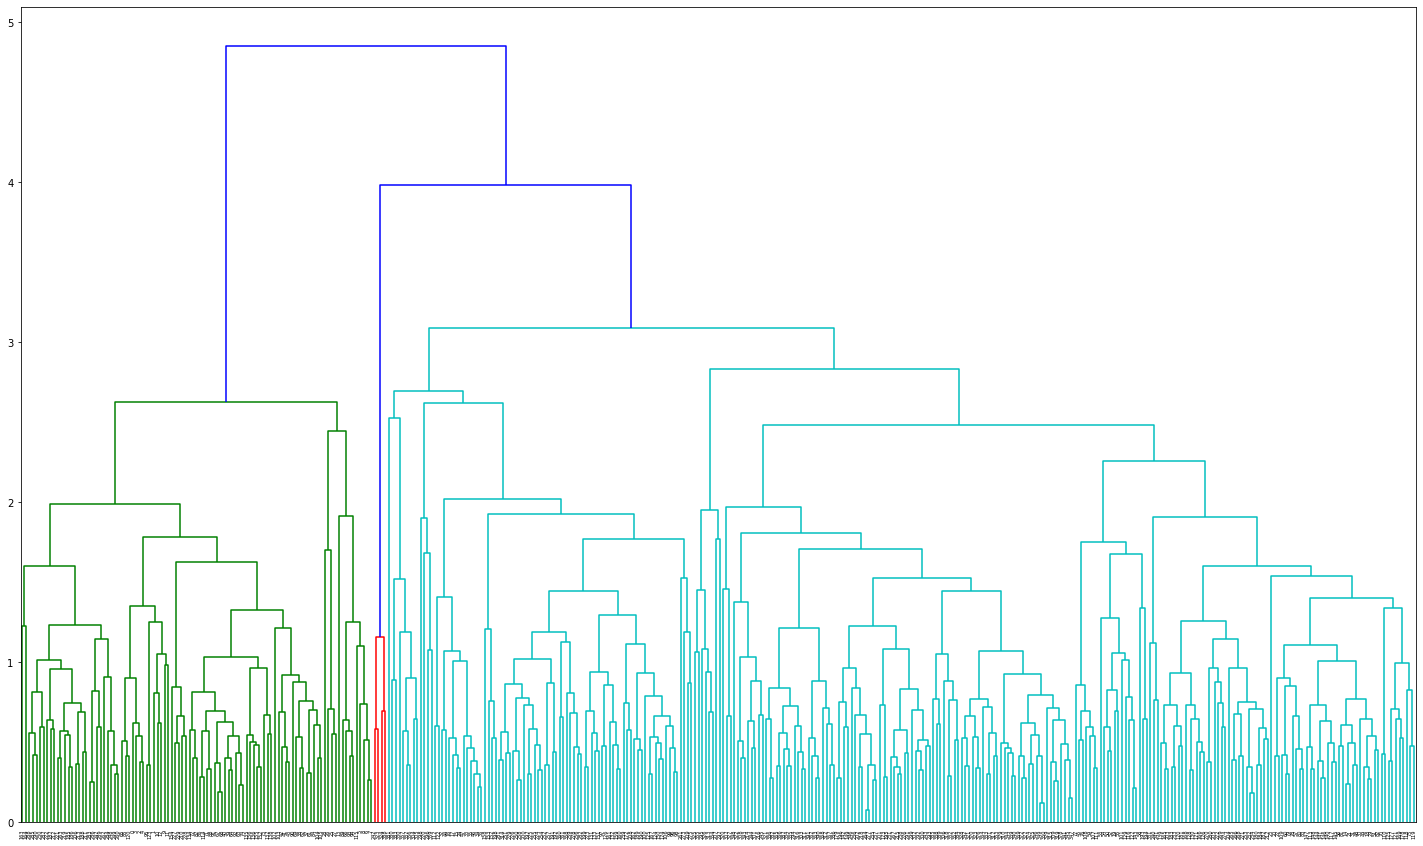

In [89]:
plt.figure(figsize=(25,15))
dendrogram(link_method)
plt.show()

From the Dendogram diagram, we can visually see that there are 2 major grouping Green, cyan colors. Also, from the KMeans we have seen that the ideal number of cluster is 2. Hence limiting the Dendogram to 2 clusters.  

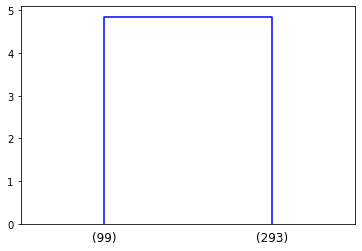

In [90]:
dendrogram(link_method,truncate_mode='lastp',  p=2, )  #setting p=2
plt.show()

In [91]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(link_method, 2, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [92]:
df_cls_H_z['Hier_clusters']=clusters

In [93]:
df_cls_H['Hier_clusters']=clusters

In [94]:
df_car['Hier_clusters']=clusters

In [95]:
df_cls_H_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   cyl            392 non-null    float64
 2   disp           392 non-null    float64
 3   hp             392 non-null    float64
 4   wt             392 non-null    float64
 5   acc            392 non-null    float64
 6   yr             392 non-null    float64
 7   Hier_clusters  392 non-null    int32  
dtypes: float64(7), int32(1)
memory usage: 36.0 KB


In [96]:
df_cls_H_z.head()

,mpg,cyl,disp,hp,wt,acc,yr,Hier_clusters
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,1
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,1
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,1
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,1
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,1


In [97]:
df_car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,KMeans_cluster,Hier_clusters
0,18.0,8,307.0,130,3504,12.0,70,USA,1,1
1,15.0,8,350.0,165,3693,11.5,70,USA,1,1
2,18.0,8,318.0,150,3436,11.0,70,USA,1,1
3,16.0,8,304.0,150,3433,12.0,70,USA,1,1
4,17.0,8,302.0,140,3449,10.5,70,USA,1,1


In [98]:
df_car.Hier_clusters.value_counts()

2    293
1     99
Name: Hier_clusters, dtype: int64

In [99]:
grpby_H = df_cls_H.groupby('Hier_clusters').mean()

In [100]:
grpby_H   #Profile from HIERARCHIAL Clustering

,mpg,cyl,disp,hp,wt,acc,yr
Hier_clusters,,,,,,,
1,14.653535,8.000000,346.626263,160.353535,4128.393939,12.694949,73.696970
2,26.416724,4.617747,142.981229,85.587031,2588.744027,16.503072,76.750853


In [101]:
grpby  #Profile from KMEANS Clustering

,mpg,cyl,disp,hp,wt,acc,yr
KMeans_cluster,,,,,,,
0,26.654035,4.564912,139.717544,84.778947,2562.470175,16.523158,76.828070
1,14.900935,7.887850,340.093458,156.915888,4083.261682,12.926168,73.719626


* KMeans_cluster 0 & Hierarchial Cluster 2 can be considered as one since they both have similar values. To make it easier, updating the Cluster value of Hierarchial from 2 to 0 to be in sync with KMeans cluster. 

In [102]:
df_car['Hier_clusters'] = df_car.Hier_clusters.replace([2],[0]) 
df_cls_H['Hier_clusters'] = df_cls_H.Hier_clusters.replace([2],[0]) 
df_cls_H_z['Hier_clusters'] = df_cls_H_z.Hier_clusters.replace([2],[0]) 

Text(0.5, 1.0, 'Visualizing Hier clusters based on mpg Vs yr')

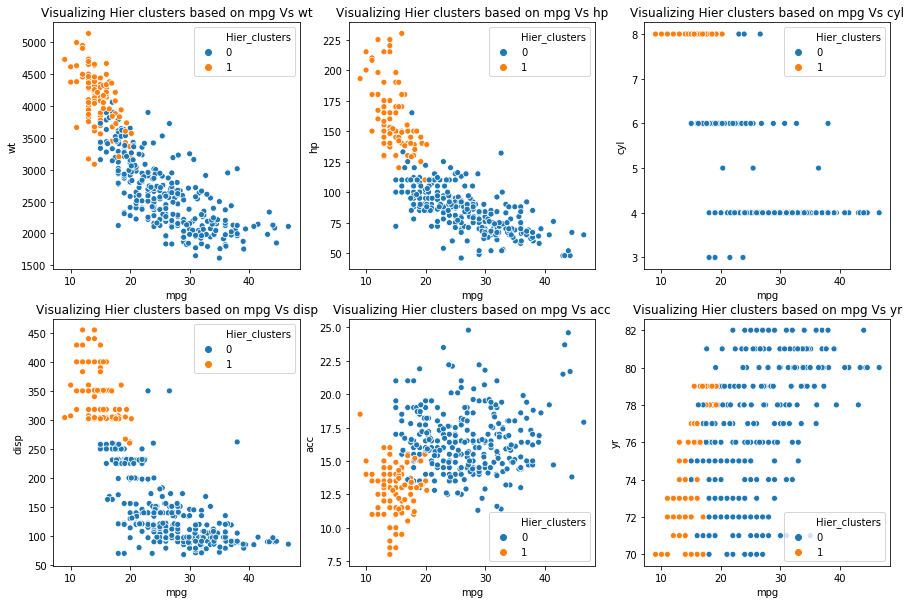

In [103]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,3), (0, 0))
sns.scatterplot(x="mpg", y="wt", hue="Hier_clusters",data=df_cls_H).set_title('Visualizing Hier clusters based on mpg Vs wt')
#
ax2 = plt.subplot2grid((2,3), (0, 1))
sns.scatterplot(x="mpg", y="hp", hue="Hier_clusters",data=df_cls_H).set_title('Visualizing Hier clusters based on mpg Vs hp')
#
ax3 = plt.subplot2grid((2,3), (0, 2))
sns.scatterplot(x="mpg", y="cyl", hue="Hier_clusters",data=df_cls_H).set_title('Visualizing Hier clusters based on mpg Vs cyl')
#
ax4 = plt.subplot2grid((2,3), (1, 0))
sns.scatterplot(x="mpg", y="disp", hue="Hier_clusters",data=df_cls_H).set_title('Visualizing Hier clusters based on mpg Vs disp')
#
ax5 = plt.subplot2grid((2,3), (1, 1))
sns.scatterplot(x="mpg", y="acc", hue="Hier_clusters",data=df_cls_H).set_title('Visualizing Hier clusters based on mpg Vs acc')
#
ax5 = plt.subplot2grid((2,3), (1, 2))
sns.scatterplot(x="mpg", y="yr", hue="Hier_clusters",data=df_cls_H).set_title('Visualizing Hier clusters based on mpg Vs yr')
#

**Observations:**
    
**1)**  

* KMeans_cluster 0 & Hierarchial Cluster 2 can be considered as one since they both have similar values.

* MNeans cluster 1 & Hierarchial Cluster 1 can be considered as one since they both have similar values. 


In [104]:
grpby_H = df_cls_H.groupby('Hier_clusters').mean()  ##Redoing the group by since the label value was changed from 2 to 0 for Hierarchial Clusteirng.
grpby_H   #Summary from Hierarchial Cluster. 

,mpg,cyl,disp,hp,wt,acc,yr
Hier_clusters,,,,,,,
0,26.416724,4.617747,142.981229,85.587031,2588.744027,16.503072,76.750853
1,14.653535,8.000000,346.626263,160.353535,4128.393939,12.694949,73.696970


In [105]:
grpby  #Summary from KMeans cluster

,mpg,cyl,disp,hp,wt,acc,yr
KMeans_cluster,,,,,,,
0,26.654035,4.564912,139.717544,84.778947,2562.470175,16.523158,76.828070
1,14.900935,7.887850,340.093458,156.915888,4083.261682,12.926168,73.719626


**2)**


The distribution of KMeans cluster & Hierarchial cluster are similar but not exactly same. 

In [106]:
df_car.Hier_clusters.value_counts()

0    293
1     99
Name: Hier_clusters, dtype: int64

In [107]:
df_car.KMeans_cluster.value_counts()

0    285
1    107
Name: KMeans_cluster, dtype: int64

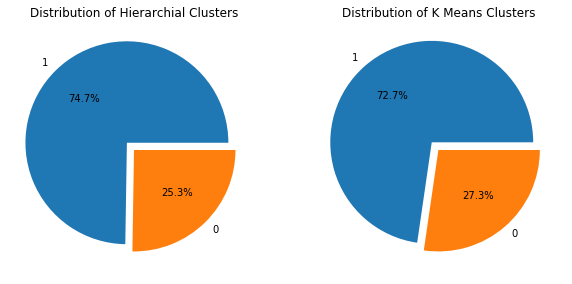

In [108]:
fig = plt.figure(figsize=(10,5))
#2 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
pd1=df_car.Hier_clusters.value_counts()
lb1 =df_car.Hier_clusters.unique()
plt.pie(pd1,labels=lb1,autopct='%1.1f%%', explode=(pd1 == max(pd1)) * 0.1) ##Explode to pop up the Max value.  
plt.title('Distribution of Hierarchial Clusters')
##
#first row sec col
ax1 = plt.subplot2grid((1,2), (0,1))
pd2=df_car.KMeans_cluster.value_counts()
lb2 =df_car.KMeans_cluster.unique()
plt.pie(pd2,labels=lb2,autopct='%1.1f%%', explode=(pd2 == max(pd2)) * 0.1)
plt.title('Distribution of K Means Clusters');
#

5. Answer below questions based on outcomes of using ML based methods.

• Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

• Use linear regression model on different clusters separately and print the coefficients of the models individually

• How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.


There are 2 clusters that can be seen in the data. we have given the explainations above in K Means and Hierarchial Clustering.
There is a clear difference between the mpg,cyl,disp,hp,wt,acc,yr columns as listed above. 


**Linear Regression**

In [109]:
from sklearn.linear_model import LinearRegression
from scipy import stats 
from sklearn.model_selection import train_test_split

In [110]:
df_car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,KMeans_cluster,Hier_clusters
0,18.0,8,307.0,130,3504,12.0,70,USA,1,1
1,15.0,8,350.0,165,3693,11.5,70,USA,1,1
2,18.0,8,318.0,150,3436,11.0,70,USA,1,1
3,16.0,8,304.0,150,3433,12.0,70,USA,1,1
4,17.0,8,302.0,140,3449,10.5,70,USA,1,1


In [111]:
df_car_Linear = df_car.copy()
df_car_KMeans = df_car.copy()
df_car_Hier = df_car.copy()

In [112]:
df_car_Linear = pd.get_dummies(df_car_Linear, columns=['origin'])
df_car_Hier = pd.get_dummies(df_car_Hier, columns=['origin'])
df_car_KMeans = pd.get_dummies(df_car_KMeans, columns=['origin'])

In [113]:
df_car_Linear.head()

,mpg,cyl,disp,hp,wt,acc,yr,KMeans_cluster,Hier_clusters,origin_Europe,origin_Japan,origin_USA
0,18.0,8,307.0,130,3504,12.0,70,1,1,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,1,1,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,1,1,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,1,1,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,1,1,0,0,1


In [114]:
df_car_Linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             392 non-null    float64
 1   cyl             392 non-null    int64  
 2   disp            392 non-null    float64
 3   hp              392 non-null    int32  
 4   wt              392 non-null    int64  
 5   acc             392 non-null    float64
 6   yr              392 non-null    int64  
 7   KMeans_cluster  392 non-null    int32  
 8   Hier_clusters   392 non-null    int64  
 9   origin_Europe   392 non-null    uint8  
 10  origin_Japan    392 non-null    uint8  
 11  origin_USA      392 non-null    uint8  
dtypes: float64(3), int32(2), int64(4), uint8(3)
memory usage: 28.7 KB


In [115]:
df_car_Hier.head()

,mpg,cyl,disp,hp,wt,acc,yr,KMeans_cluster,Hier_clusters,origin_Europe,origin_Japan,origin_USA
0,18.0,8,307.0,130,3504,12.0,70,1,1,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,1,1,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,1,1,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,1,1,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,1,1,0,0,1


In [116]:
df_car_Hier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             392 non-null    float64
 1   cyl             392 non-null    int64  
 2   disp            392 non-null    float64
 3   hp              392 non-null    int32  
 4   wt              392 non-null    int64  
 5   acc             392 non-null    float64
 6   yr              392 non-null    int64  
 7   KMeans_cluster  392 non-null    int32  
 8   Hier_clusters   392 non-null    int64  
 9   origin_Europe   392 non-null    uint8  
 10  origin_Japan    392 non-null    uint8  
 11  origin_USA      392 non-null    uint8  
dtypes: float64(3), int32(2), int64(4), uint8(3)
memory usage: 28.7 KB


**Linear Regression on the original data**

Linear Regression with mpg as the Target variable. Removing the recently added Clusters, One of the Hot encoded Origin column

In [117]:
X = df_car_Linear.drop(['mpg','KMeans_cluster','Hier_clusters','origin_Europe'], axis=1)

In [118]:
y = df_car_Linear['mpg']

In [119]:
X.shape

(392, 8)

In [120]:
y.shape

(392,)

Test-train split 

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

In [122]:
regr_model = LinearRegression()
regr_model.fit(X_train, y_train)

LinearRegression()

In [123]:
print("Intercept:", regr_model.intercept_)
print("Coeff:", regr_model.coef_)

Intercept: -15.633391395401052
Coeff: [-0.70179266  0.03579125 -0.01490109 -0.00753083  0.07904835  0.80030135
 -0.10746335 -3.19333203]


In [124]:
or_train = regr_model.score(X_train, y_train)
or_train

0.8309515810263383

In [125]:
or_test = regr_model.score(X_test, y_test)
or_test

0.7927105446234823

**Linear Regression on the Clustered data**

In order to do Regression on the Clustered data, we will consider the Hierarchial clustered data since both KMeans and Hierarchial clustered data are very close; hierarchial cluster having a very slightly better score. 


In [126]:
df_car_Hier = df_car_KMeans.drop(['KMeans_cluster'], axis=1)

In [127]:
df_car_Hier.head()

,mpg,cyl,disp,hp,wt,acc,yr,Hier_clusters,origin_Europe,origin_Japan,origin_USA
0,18.0,8,307.0,130,3504,12.0,70,1,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,1,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,1,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,1,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,1,0,0,1


Lets split the Cluster data into 2 separate datasets and do apply regression. Idea here being with the data that is clustered, the data is more closer and the models are able to explain the variances between the data better.  

In [128]:
df_car_Hier['Hier_clusters'].value_counts()

0    293
1     99
Name: Hier_clusters, dtype: int64

Lets split 0s and 1s into 2 Datasets. 

In [129]:
df_car_Hier_0 = df_car_Hier[df_car_Hier['Hier_clusters']==0]   #Clusters 0

In [130]:
df_car_Hier_1 = df_car_Hier[df_car_Hier['Hier_clusters']==1]   #Clusters 1

**Linear Regression on Hierarchy Cluster 0: df_car_Hier_0**

In [131]:
df_car_Hier_0.head()

,mpg,cyl,disp,hp,wt,acc,yr,Hier_clusters,origin_Europe,origin_Japan,origin_USA
14,24.0,4,113.0,95,2372,15.0,70,0,0,1,0
15,22.0,6,198.0,95,2833,15.5,70,0,0,0,1
16,18.0,6,199.0,97,2774,15.5,70,0,0,0,1
17,21.0,6,200.0,85,2587,16.0,70,0,0,0,1
18,27.0,4,97.0,88,2130,14.5,70,0,0,1,0


Dropping the Hier cluster feature from this data set. 

In [132]:
df_car_Hier_0 = df_car_Hier_0.drop('Hier_clusters', axis=1)

In [133]:
df_car_Hier_0 = df_car_Hier_0.drop('origin_Europe', axis=1)

In [134]:
X_0 = df_car_Hier_0.drop(['mpg'], axis=1)
y_0 = df_car_Hier_0['mpg']

In [135]:
print(X_0.shape)
print(y_0.shape)

(293, 8)
(293,)


In [136]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.25, random_state=6)
regr_model_0 = LinearRegression()
regr_model_0.fit(X_train_0, y_train_0)

LinearRegression()

In [137]:
print("Intercept:", regr_model_0.intercept_)
print("Coeff:", regr_model_0.coef_)

Intercept: -21.07875043730969
Coeff: [ 6.89284999e-01  1.75655156e-03 -7.29129541e-02 -6.89231094e-03
  5.91001094e-02  8.86416229e-01  7.98016081e-02 -1.79503089e+00]


In [138]:
train_scr_0 = regr_model_0.score(X_train_0, y_train_0)
train_scr_0

0.788881179153853

In [139]:
test_scr_0 = regr_model_0.score(X_test_0, y_test_0)
test_scr_0

0.7457566313481205

In [140]:
print('Clustered(0) Linear Regression train score:',train_scr_0)
print('Clustered(0) Linear Regression test score:',test_scr_0)

Clustered(0) Linear Regression train score: 0.788881179153853
Clustered(0) Linear Regression test score: 0.7457566313481205


**Linear Regression on Hierarchy Cluster 0: df_car_Hier_1**

In [141]:
df_car_Hier_1 = df_car_Hier_1.drop('Hier_clusters', axis=1)

In [142]:
df_car_Hier_1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_Europe,origin_Japan,origin_USA
0,18.0,8,307.0,130,3504,12.0,70,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,0,0,1


In [143]:
df_car_Hier_1 = df_car_Hier_1.drop('origin_Europe', axis=1)
X_1 = df_car_Hier_1.drop(['mpg'], axis=1)
y_1 = df_car_Hier_1['mpg']
print(X_1.shape)
print(y_1.shape)

(99, 8)
(99,)


In [144]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.25, random_state=6)
regr_model_1 = LinearRegression()
regr_model_1.fit(X_train_1, y_train_1)

print("Intercept:", regr_model_1.intercept_)
print("Coeff:", regr_model_1.coef_)

train_scr_1 = regr_model_1.score(X_train_1, y_train_1)
test_scr_1 = regr_model_1.score(X_test_1, y_test_1)

Intercept: -2.6298916249921707
Coeff: [ 0.         -0.00785997 -0.00899896 -0.00120601 -0.49220421  0.4431718
  0.          0.        ]


In [145]:
print('Clustered(1) Linear Regression train score:',train_scr_1)
print('Clustered(1) Linear Regression test score:',test_scr_1)

Clustered(1) Linear Regression train score: 0.5455021403715183
Clustered(1) Linear Regression test score: 0.7005596610963271


The Clustered Linear Regression score on Cluster 0 & 1 are substantially lower than the Linear Regression on the original data without the Clustered data. 

Reson here could be the volume of records when the data is split into Cluster 0 and Cluster 1. 
Cluster 0 has only 293 records & Cluster 1 has only 99 records. Which gets even reduced further with Train and Test split. 



In order to just check/prove that the number of records in the dataset is a reason for the dip in accuracy, creating a dummy dataset & replicating the data to around 30K & testing with that. 

In [146]:
df_car_Hier_0_replicate = df_car_Hier_0.copy()

In [147]:
df_car_Hier_0_replicated = df_car_Hier_0_replicate.append([df_car_Hier_0]*100,ignore_index=True)

In [148]:
df_car_Hier_0_replicated.shape

(29593, 9)

In [149]:
X_0_repl = df_car_Hier_0_replicated.drop(['mpg'], axis=1)

In [150]:
X_0_repl.shape

(29593, 8)

In [151]:
y_0_repl = df_car_Hier_0_replicated['mpg']

In [152]:
y_0_repl.shape

(29593,)

In [153]:
X_train_0_repl, X_test_0_repl, y_train_0_repl, y_test_0_repl = train_test_split(X_0_repl, y_0_repl, test_size=0.25, random_state=6)
regr_model_repl_0 = LinearRegression()
regr_model_repl_0.fit(X_train_0_repl, y_train_0_repl)

LinearRegression()

In [154]:
print("Intercept:", regr_model_repl_0.intercept_)
print("Coeff:", regr_model_repl_0.coef_)

Intercept: -18.65582407700031
Coeff: [ 0.47417147  0.00514341 -0.07903141 -0.00720772  0.03478578  0.88666574
 -0.2895742  -1.9483931 ]


In [155]:
train_scr_0_repl = regr_model_repl_0.score(X_train_0_repl, y_train_0_repl)
train_scr_0_repl

0.7785007413514607

In [156]:
test_scr_0_repl = regr_model_repl_0.score(X_test_0_repl, y_test_0_repl)
test_scr_0_repl

0.7836018257327562

In [157]:
print('Clustered(0) Linear Regression train score with Data replicated:',train_scr_0_repl)
print('Clustered(0) Linear Regression test score with data replicated:',test_scr_0_repl)

Clustered(0) Linear Regression train score with Data replicated: 0.7785007413514607
Clustered(0) Linear Regression test score with data replicated: 0.7836018257327562


We can see a jump in the test score. Hence concluding that the data volume in the input file is very low to see significant improvement in the Clustered Linear Regression. i.e. Linear Regression on Original data test score > Linear Regression on Clustered data's test score because of the lower number of records in the data.  

In [158]:
print("Linear regression on Original data - Train score:",or_train)
print("Linear regression on Original data - Test score:",or_test)
print('')
print('Clustered(0) Linear Regression train score:',train_scr_0)
print('Clustered(0) Linear Regression test score:',test_scr_0)
print('')
print('Clustered(1) Linear Regression train score:',train_scr_1)
print('Clustered(1) Linear Regression test score:',test_scr_1)
print('')
print('Just for proof, to show that the lower number of records in the data could be a factor in the reduced model score-Replicated the data and did a sample Linear Regression on Cluster 0 for verification')
print('Linear Regression on Cluster(0) with Data replicated to about 30K records - train score:',train_scr_0_repl)
print('Linear Regression on Cluster(0) with Data replicated to about 30K records - test score:',test_scr_0_repl)
print('')


Linear regression on Original data - Train score: 0.8309515810263383
Linear regression on Original data - Test score: 0.7927105446234823

Clustered(0) Linear Regression train score: 0.788881179153853
Clustered(0) Linear Regression test score: 0.7457566313481205

Clustered(1) Linear Regression train score: 0.5455021403715183
Clustered(1) Linear Regression test score: 0.7005596610963271

Just for proof, to show that the lower number of records in the data could be a factor in the reduced model score-Replicated the data and did a sample Linear Regression on Cluster 0 for verification
Linear Regression on Cluster(0) with Data replicated to about 30K records - train score: 0.7785007413514607
Linear Regression on Cluster(0) with Data replicated to about 30K records - test score: 0.7836018257327562



**Conclusion of Part One**

Linear Regression on the original data (392) has a Test score of about 79%. 
While Linear Regression on the Clustered data (clusters 0 - 293 records & Cluster 1 - 99 records) are 74% & 75%. 

By seggregating the data into 2 clusters and doing regression we expect the score to be higher than the linear regression on original data. 
But in this case here, Linear Regression on Original data test score > Linear Regression on Clustered data. This could be due to the number of records. 
If the number of records are more than the Linear Regression on the Clustered data is expected to be higher. 

Two things could be factors here:

a) No. of Records is very less. With higher no.of records, the scores could be better. (We have seen that with replicated data, we could prove the same)

b) CLR (Clustered Linear Regression) can make good linear approximations **only** on large data sets. in small data sets, generally CLR gives inaccurate results. 

c)  Curse of dimensionality is a possible problem in CLR, however in our case since the number of features are limited, this should not have been a problem.

http://repository.bilkent.edu.tr/bitstream/handle/11693/24733/Clustered%20linear%20regression.pdf;jsessionid=34445DF31CD5F75B5F74946C93801FB5?sequence=1

**Improvisation/Suggestion:** 

a) The number of observations are very less (398). No. of features could have been more as well - Features like City driven or Highway driven, Driven by experienced drivers or not, cars driven in Harsh weather conditions, etc.. 
Because these might impact some of the factors and possibly the clustering. 

b) **The number of steps asked in this project is too  big**. Definetly way more than all the previous projects. Would be better if the number of steps asked in the project is less. This is a huge project to be completed within the timelines given (considering our other personal/professional careers)


***End of Part One***

--

## PART TWO

PROJECT OBJECTIVE: Goal is to build a synthetic data generation model using the existing data provided by the company.

1. Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data

Data is given in a excel file. 

In [159]:
df_wine=pd.ExcelFile('./Part2 - Company.xlsx', engine='openpyxl')

In [160]:
df_wine

Dataframe doesnt open & has to be parsed first, before opening. 

In [161]:
df_wine = df_wine.parse("Sheet1")  #The sheet name is Sheet1

In [162]:
df_wine

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
...,...,...,...,...,...
56,200,186,185,179,Quality B
57,137,182,165,199,NaN
58,88,39,9,102,NaN
59,180,157,192,198,NaN


In [163]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [164]:
df_wine.shape

(61, 5)

**Here is the information given in the "Unsupervised Learning - Project - Additional Reference" sheet for guidance. **

Target variable of the existing dataset has missing values.

Use the dataset ( ignore the existing target ) to generate clusters ( new potential target )

Compare the clusters with the existing target and find if they follow similar pattern.

If you find a similar pattern replace the newly predicted cluster with original missing targets from dataset


In [165]:
df_wine_clst = df_wine.copy()  #Making a copy of the wine dataframe for Clustering purposes

In [166]:
df_wine_clst.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


Quality is the target column & has NaN values. 

In [167]:
df_wine_clst.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

There are 18 Null values

Dropping the Quality feature from the dataframe for further processing since that is the target column. 

In [168]:
df_wine_clst = df_wine_clst.drop(['Quality'], axis=1)

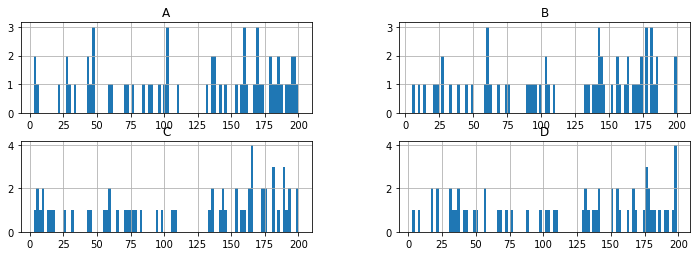

In [169]:
df_wine_clst.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

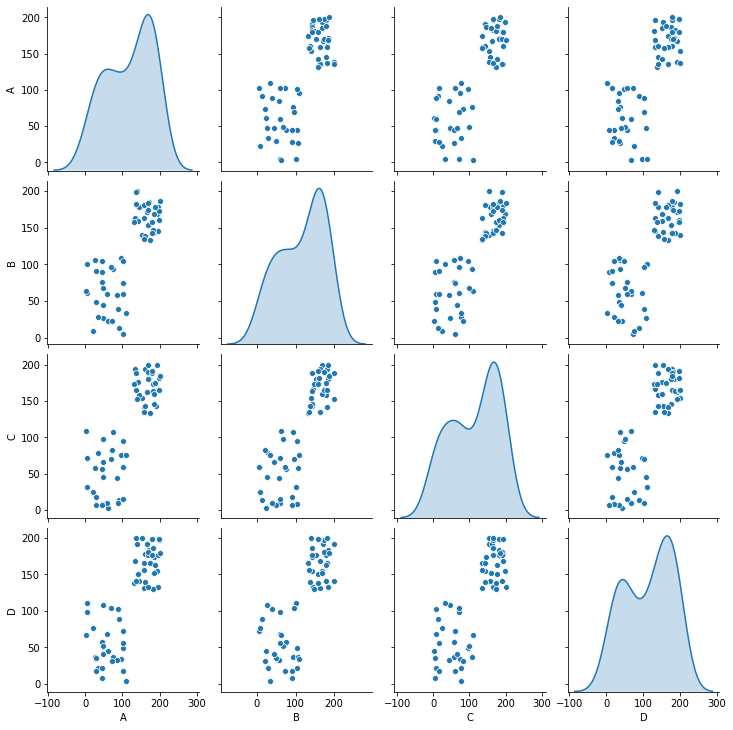

In [170]:
sns.pairplot(df_wine_clst, diag_kind='kde'); 

The distribution is very clearly grouped into 2 clusters. 

Since the clustering is based on the distance, applying zscore to the data to standardize it.  

In [171]:
df_wine_clst_z = df_wine_clst.apply(zscore)

In [172]:
df_wine_clst_z.head()

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864


As we have seen above the number of clusters that can be seen in the data visualization is 2, hence going with the KMeans clusterig for 2. 

In [173]:
km = KMeans(n_clusters = 2)
km.fit(df_wine_clst_z)

KMeans(n_clusters=2)

In [174]:
labels_wine = km.labels_

In [175]:
labels_wine

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [176]:
# silhouette_score
silhouette_score(df_wine_clst_z,labels_wine)

0.6891674125195145

Adding the new label (cluster) created by the K Means to the original data for comparison. 

In [177]:
df_wine['KMeans_Quality'] = labels_wine

In [178]:
df_wine.head()

,A,B,C,D,Quality,KMeans_Quality
0,47,27,45,108,Quality A,0
1,174,133,134,166,Quality B,1
2,159,163,135,131,NaN,1
3,61,23,3,44,Quality A,0
4,59,60,9,68,Quality A,0


To be in sync with the existing Quality column values, updating the KMeans_quality. 

In [179]:
df_wine['KMeans_Quality'] = df_wine['KMeans_Quality'].replace({0: 'Quality A', 1: 'Quality B'})

In [180]:
df_wine.head()

,A,B,C,D,Quality,KMeans_Quality
0,47,27,45,108,Quality A,Quality A
1,174,133,134,166,Quality B,Quality B
2,159,163,135,131,NaN,Quality B
3,61,23,3,44,Quality A,Quality A
4,59,60,9,68,Quality A,Quality A


In [181]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   A               61 non-null     int64 
 1   B               61 non-null     int64 
 2   C               61 non-null     int64 
 3   D               61 non-null     int64 
 4   Quality         43 non-null     object
 5   KMeans_Quality  61 non-null     object
dtypes: int64(4), object(2)
memory usage: 3.0+ KB


In order to match the Quality (original data) Vs. KMeans_Quality, we need to exclude the NaN records. 

In [182]:
#nn: not nulls
df_wine_nn = df_wine.dropna()

In [183]:
df_wine_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 56
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   A               43 non-null     int64 
 1   B               43 non-null     int64 
 2   C               43 non-null     int64 
 3   D               43 non-null     int64 
 4   Quality         43 non-null     object
 5   KMeans_Quality  43 non-null     object
dtypes: int64(4), object(2)
memory usage: 2.4+ KB


Checking if all the K Means Quality is same as the Quality (original)  

In [184]:
(df_wine_nn['Quality'] ==  df_wine_nn['KMeans_Quality']).value_counts()

True    43
dtype: int64

We can see that all the 43 instances are exactly same as the Original one. Hence we can assume that the K-Means clustering of Quality is 100% accurate. 

Since the accuracy of clustering is 100%, updating the Quality with the K-Means Quality. 

In [185]:
df_wine

,A,B,C,D,Quality,KMeans_Quality
0,47,27,45,108,Quality A,Quality A
1,174,133,134,166,Quality B,Quality B
2,159,163,135,131,NaN,Quality B
3,61,23,3,44,Quality A,Quality A
4,59,60,9,68,Quality A,Quality A
...,...,...,...,...,...,...
56,200,186,185,179,Quality B,Quality B
57,137,182,165,199,NaN,Quality B
58,88,39,9,102,NaN,Quality A
59,180,157,192,198,NaN,Quality B


In [186]:
df_wine_final = df_wine.copy()

In [187]:
df_wine_final['Quality'] = df_wine_final['KMeans_Quality']

In [188]:
df_wine_final = df_wine_final.drop(['KMeans_Quality'], axis=1)

In [189]:
df_wine_final.isna().sum()

A          0
B          0
C          0
D          0
Quality    0
dtype: int64

After updating the Quality values from Kmeans cluster we can see that there are no more missing values. 

In [190]:
df_wine_final

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,Quality B
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
...,...,...,...,...,...
56,200,186,185,179,Quality B
57,137,182,165,199,Quality B
58,88,39,9,102,Quality A
59,180,157,192,198,Quality B


In [191]:
df_wine_final.Quality.value_counts()

Quality B    33
Quality A    28
Name: Quality, dtype: int64

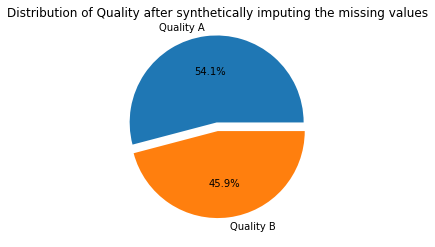

In [192]:
pd=df_wine_final.Quality.value_counts()
lb =df_wine_final.Quality.unique()
plt.pie(pd,labels=lb,autopct='%1.1f%%', explode=(pd == max(pd)) * 0.1)
plt.title('Distribution of Quality after synthetically imputing the missing values');

**End of Part Two**

--

## PART THREE

PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the 
model using just the raw data

1. Data: Import, clean and pre-process the data

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.colorcodes=True

In [194]:
df_veh = pd.read_csv('Part3 - vehicle.csv')

In [195]:
df_veh.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [196]:
df_veh.shape

(846, 19)

In [197]:
df_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

From the Info(), we can clearly see few null values in the data. 

In [198]:
nullcols = pd.DataFrame(df_veh.isnull().sum())
nullcols = nullcols[nullcols>0]

In [199]:
nullcols = nullcols.dropna()
nullcols

,0
circularity,5.0
distance_circularity,4.0
radius_ratio,6.0
pr.axis_aspect_ratio,2.0
scatter_ratio,1.0
elongatedness,1.0
pr.axis_rectangularity,3.0
scaled_variance,3.0
scaled_variance.1,2.0
scaled_radius_of_gyration,2.0


In [200]:
nullcols.index

Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2'],
      dtype='object')

Imputing the data with Median value for the columns that has null values. 

In [201]:
for cols in nullcols.index:
        df_veh[cols] = df_veh[cols].fillna(df_veh[cols].median())

In [202]:
df_veh.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

After impute there is no null value. 

2. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden 
patterns by using all possible methods

In [203]:
df_veh.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.823877,82.100473,168.874704,61.677305,8.567376,168.887707,40.936170,20.580378,147.998818,188.596927,439.314421,174.706856,72.443262,6.361702,12.600473,188.918440,195.632388
std,8.234474,6.134272,15.741569,33.401356,7.882188,4.601217,33.197710,7.811882,2.588558,14.515652,31.360427,176.496341,32.546277,7.468734,4.903244,8.930962,6.152247,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.250000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.750000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


Finding the Distribution of all the features

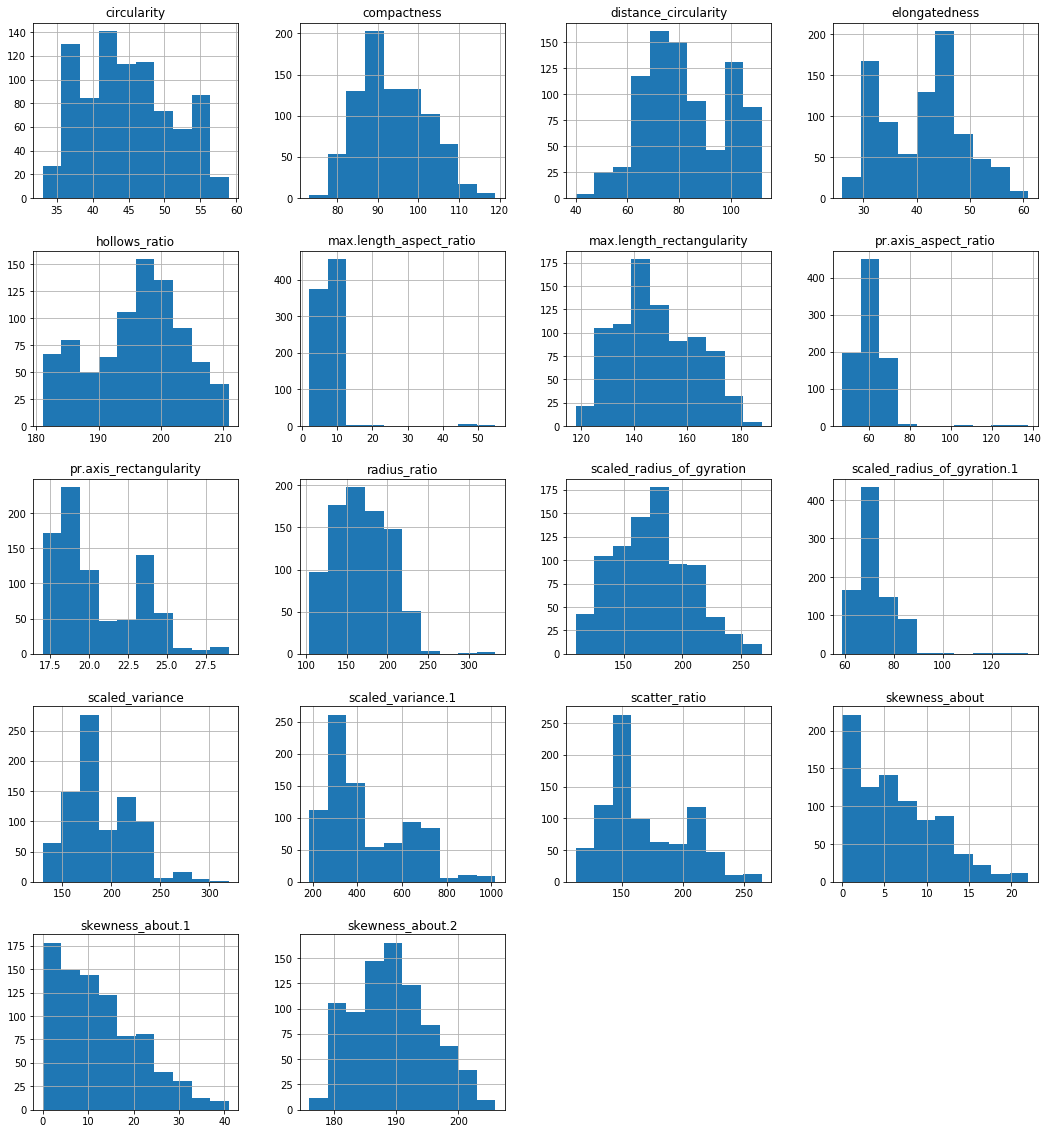

In [204]:
df_veh.hist(figsize=(18,20));
plt.show()

Distribution of these Imput features are distinctively different. Each distribution is different and not normal in most of the cases. 

Bivariate analysis - Plotting the Target variable "class" vs all the input features

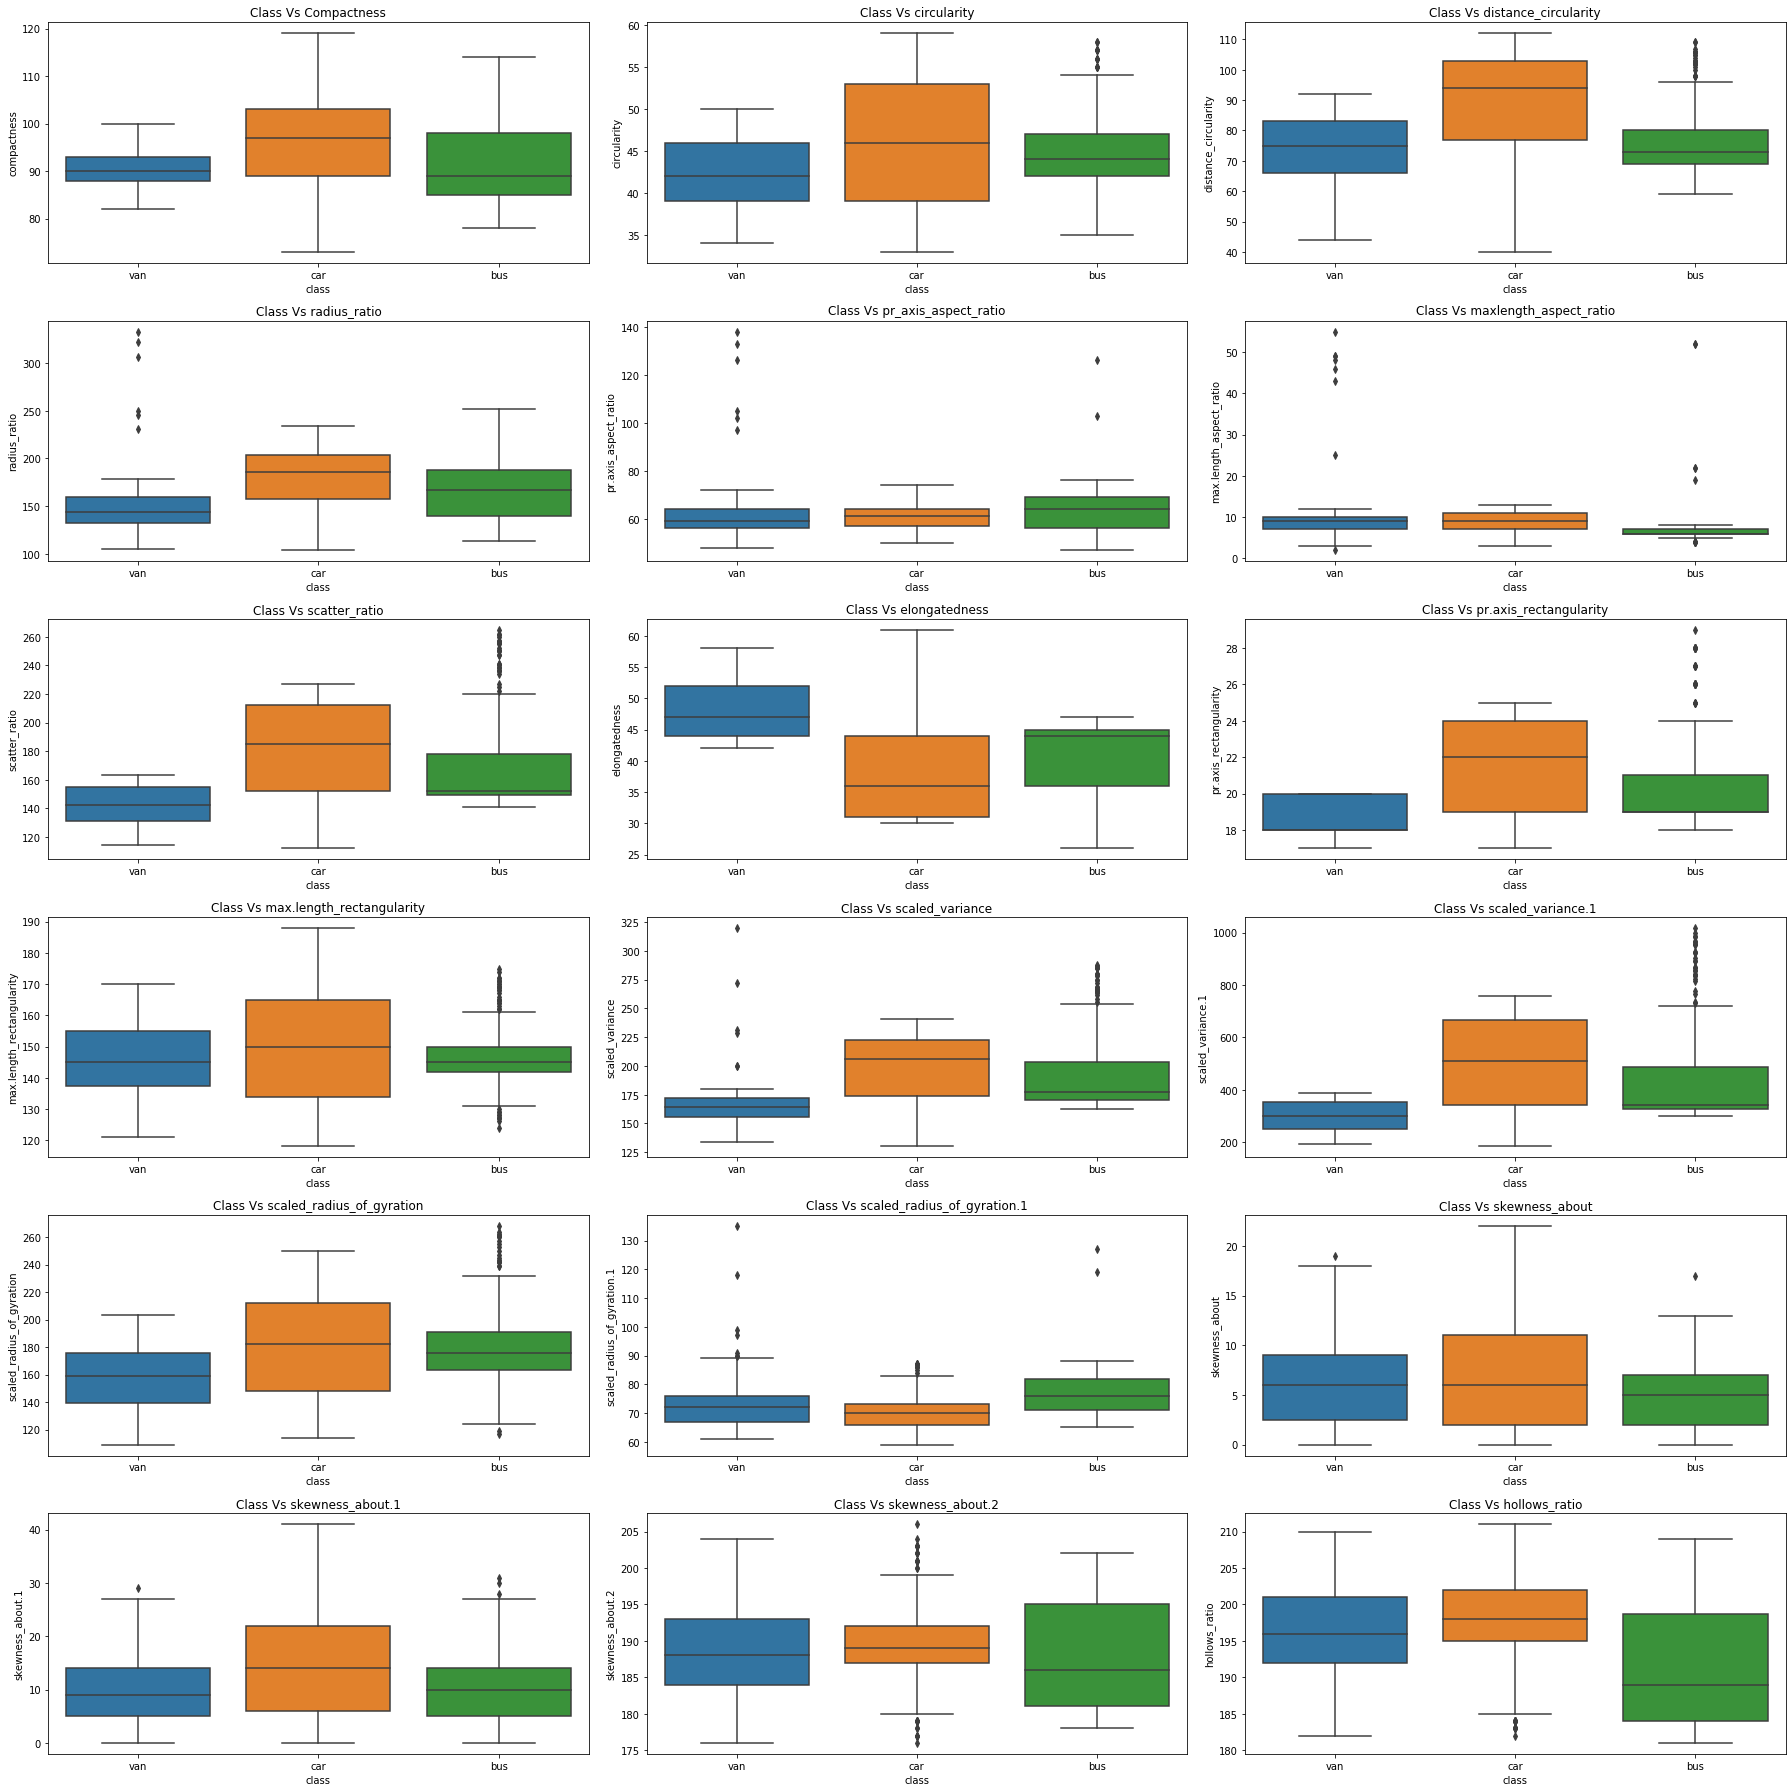

In [205]:
fig,axs = plt.subplots(6,3,figsize=(25,25))
sns.boxplot(x="class", y="compactness",data=df_veh,ax=axs[0,0]).set_title('Class Vs Compactness');
sns.boxplot(x="class", y="circularity",data=df_veh,ax=axs[0,1]).set_title('Class Vs circularity');
sns.boxplot(x="class", y="distance_circularity",data=df_veh,ax=axs[0,2]).set_title('Class Vs distance_circularity');
sns.boxplot(x="class", y="radius_ratio",data=df_veh,ax=axs[1,0]).set_title('Class Vs radius_ratio');
sns.boxplot(x="class", y="pr.axis_aspect_ratio",data=df_veh,ax=axs[1,1]).set_title('Class Vs pr_axis_aspect_ratio');
sns.boxplot(x="class", y="max.length_aspect_ratio",data=df_veh,ax=axs[1,2]).set_title('Class Vs maxlength_aspect_ratio');
sns.boxplot(x="class", y="scatter_ratio",data=df_veh,ax=axs[2,0]).set_title('Class Vs scatter_ratio');
sns.boxplot(x="class", y="elongatedness",data=df_veh,ax=axs[2,1]).set_title('Class Vs elongatedness');
sns.boxplot(x="class", y="pr.axis_rectangularity",data=df_veh,ax=axs[2,2]).set_title('Class Vs pr.axis_rectangularity');
sns.boxplot(x="class", y="max.length_rectangularity",data=df_veh,ax=axs[3,0]).set_title('Class Vs max.length_rectangularity');
sns.boxplot(x="class", y="scaled_variance",data=df_veh,ax=axs[3,1]).set_title('Class Vs scaled_variance');
sns.boxplot(x="class", y="scaled_variance.1",data=df_veh,ax=axs[3,2]).set_title('Class Vs scaled_variance.1');
sns.boxplot(x="class", y="scaled_radius_of_gyration",data=df_veh,ax=axs[4,0]).set_title('Class Vs scaled_radius_of_gyration');
sns.boxplot(x="class", y="scaled_radius_of_gyration.1",data=df_veh,ax=axs[4,1]).set_title('Class Vs scaled_radius_of_gyration.1');
sns.boxplot(x="class", y="skewness_about",data=df_veh,ax=axs[4,2]).set_title('Class Vs skewness_about');
sns.boxplot(x="class", y="skewness_about.1",data=df_veh,ax=axs[5,0]).set_title('Class Vs skewness_about.1');
sns.boxplot(x="class", y="skewness_about.2",data=df_veh,ax=axs[5,1]).set_title('Class Vs skewness_about.2');
sns.boxplot(x="class", y="hollows_ratio",data=df_veh,ax=axs[5,2]).set_title('Class Vs hollows_ratio');
fig.tight_layout()

Overall observation is that Car has more value of all the feature columns

Checking the distribution of Target. 

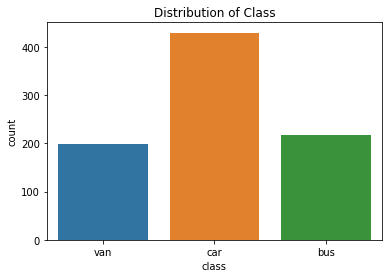

In [206]:
sns.countplot(df_veh['class']).set_title("Distribution of Class");

In [207]:
df_veh['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

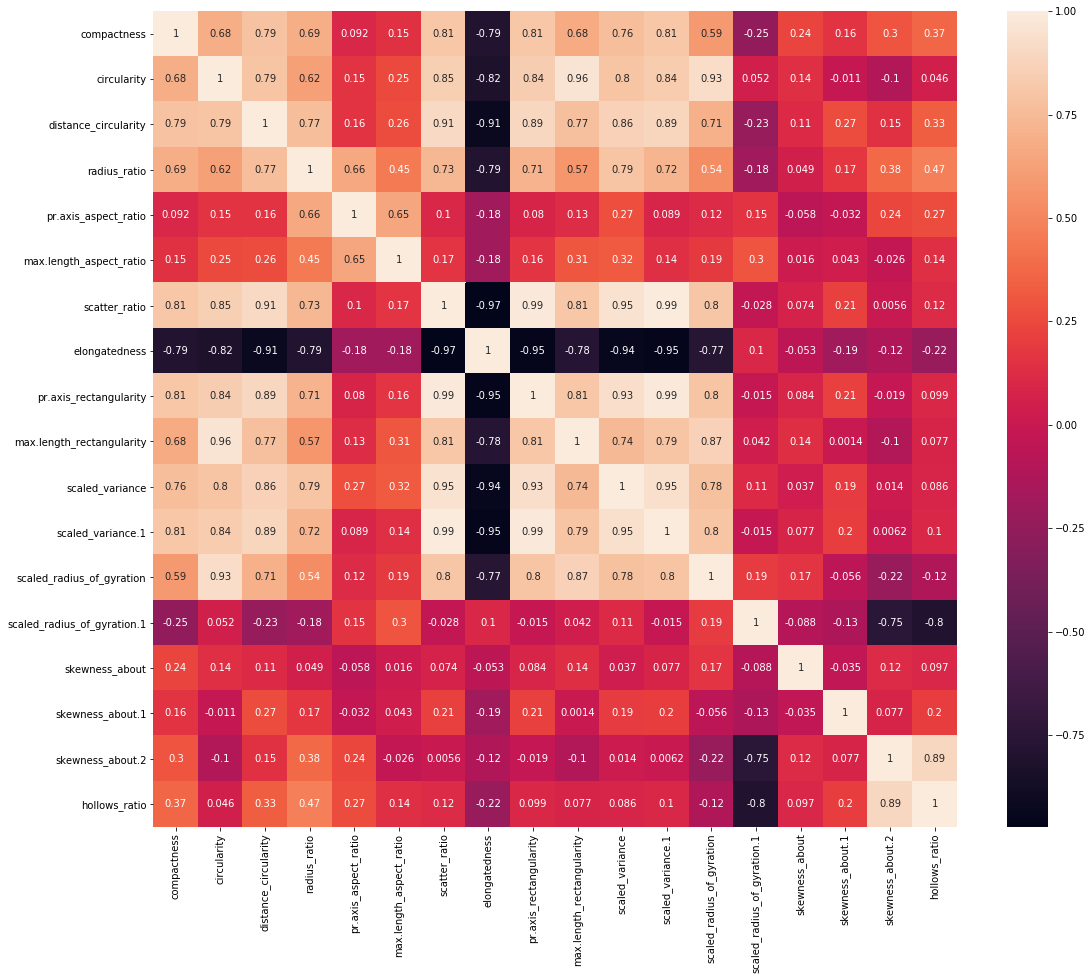

In [208]:
plt.figure(figsize=(18,15))
corr_veh=df_veh.corr()
sns.heatmap(corr_veh,annot=True)
plt.show();

In [209]:
df_veh['class']=df_veh['class'].astype('category') 

Checking for Variable inflation Factor among the columns. 

In [210]:
import pandas as pd
import numpy as np

df_vif = df_veh.drop(['class'], axis=1)  ##Taking all the Features

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['Feature']=df_vif.columns

In [211]:
vif_data['VIF']=[variance_inflation_factor(df_vif.values,i)
                        for i in range(len(df_vif.columns))]

In [212]:
vif_data.sort_values(by='VIF', ascending=False)

,Feature,VIF
17,hollows_ratio,10191.238482
16,skewness_about.2,9891.915576
6,scatter_ratio,4720.106366
8,pr.axis_rectangularity,3927.340496
9,max.length_rectangularity,2023.513534
1,circularity,1635.533003
10,scaled_variance,1343.645204
3,radius_ratio,819.277765
4,pr.axis_aspect_ratio,802.008918
13,scaled_radius_of_gyration.1,717.642300


We can see that the VIF factor is extremely high here among some of the features. 

3. Classifier: Design and train a best fit SVM classier using all the data attributes

Splitting data into X & y

In [213]:
X = df_veh.drop(['class'], axis=1)
y =  df_veh['class']

In [214]:
X.shape

(846, 18)

In [215]:
y.shape

(846,)

**SVM with all the features**

In [216]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
sns.set(color_codes=True)

Applying zscore to standardize X i.e. input features

In [217]:
X_Scale=X.apply(zscore)
X_Scale.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X_Scale, y, test_size = 0.3, random_state = 6)

In [219]:
X_train.shape

(592, 18)

In [220]:
X_test.shape

(254, 18)

In [221]:
X_Scale.shape

(846, 18)

In [222]:
# Building a Support Vector Machine on train data
svc_clf = svm.SVC(gamma=0.025, C=3)   
svc_clf.fit(X_train, y_train)

SVC(C=3, gamma=0.025)

In [223]:
pred = svc_clf.predict(X_train)

In [224]:
train_score = metrics.accuracy_score(y_train, pred)
train_score

0.9746621621621622

In [225]:
pred_test = svc_clf.predict(X_test)

In [226]:
test_score = metrics.accuracy_score(y_test, pred_test)
test_score

0.984251968503937

In [227]:
print("Classification Report")
print(metrics.classification_report(y_test, pred_test, labels=['car','bus','van']))

Classification Report
              precision    recall  f1-score   support

         car       0.99      0.99      0.99       140
         bus       1.00      1.00      1.00        57
         van       0.96      0.96      0.96        57

    accuracy                           0.98       254
   macro avg       0.98      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254



In [228]:
cm=metrics.confusion_matrix(y_test, pred_test, labels=['car','bus','van'])

In [229]:
cm

array([[138,   0,   2],
       [  0,  57,   0],
       [  2,   0,  55]], dtype=int64)

In [230]:
import pandas as pd
import numpy as np
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual_car", "Actual_bus", "Actual_van"]], 
                     columns = [i for i in ["Predict_car", "Predict_bus", "Predict_van"]])

In [231]:
print("Confusion Matrix")
df_cm

Confusion Matrix


,Predict_car,Predict_bus,Predict_van
Actual_car,138,0,2
Actual_bus,0,57,0
Actual_van,2,0,55


The Model accuracy of the SVM classifier with all the input features is pretty good @ 98%

4. Dimensional reduction: perform dimensional reduction on the data.

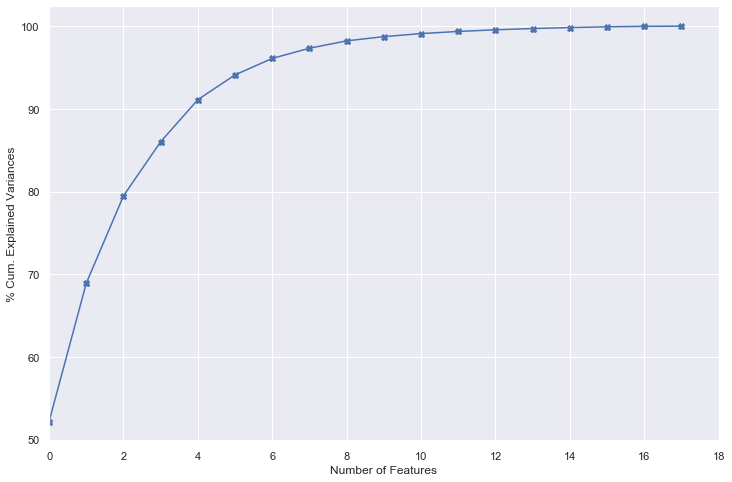

In [232]:
pca = PCA()
X_pca_ = pca.fit_transform(X_Scale)
plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 18)
plt.xlabel('Number of Features')
plt.ylabel('% Cum. Explained Variances');

In [233]:
print(pca.explained_variance_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


In [234]:
len(X_Scale.columns)

18

In [235]:
df_pca = pd.DataFrame()
df_pca['cols'] = X_Scale.columns

In [236]:
df_pca['explained_variance'] = np.cumsum(pca.explained_variance_ratio_) * 100

In [237]:
df_pca

,cols,explained_variance
0,compactness,52.186034
1,circularity,68.915802
2,distance_circularity,79.478441
3,radius_ratio,86.025901
4,pr.axis_aspect_ratio,91.115770
5,max.length_aspect_ratio,94.112183
6,scatter_ratio,96.103549
7,elongatedness,97.335049
8,pr.axis_rectangularity,98.226265
9,max.length_rectangularity,98.735979


95% of Explained variances is a good point. 
**No.of Features = 6** gives about **95% of Explained variances**. 

In [239]:
pca_updated = PCA(n_components=6)
pca_updated.fit(X_Scale)

PCA(n_components=6)

eigen vectors:

In [240]:
pca_updated.components_ 

array([[ 2.75283688e-01,  2.93258469e-01,  3.04609128e-01,
         2.67606877e-01,  8.05039890e-02,  9.72756855e-02,
         3.17092750e-01, -3.14133155e-01,  3.13959064e-01,
         2.82830900e-01,  3.09280359e-01,  3.13788457e-01,
         2.72047492e-01, -2.08137692e-02,  4.14555082e-02,
         5.82250207e-02,  3.02795063e-02,  7.41453913e-02],
       [-1.26953763e-01,  1.25576727e-01, -7.29516436e-02,
        -1.89634378e-01, -1.22174860e-01,  1.07482875e-02,
         4.81181371e-02,  1.27498515e-02,  5.99352482e-02,
         1.16220532e-01,  6.22806229e-02,  5.37843596e-02,
         2.09233172e-01,  4.88525148e-01, -5.50899716e-02,
        -1.24085090e-01, -5.40914775e-01, -5.40354258e-01],
       [-1.19922479e-01, -2.48205467e-02, -5.60143254e-02,
         2.75074211e-01,  6.42012966e-01,  5.91801304e-01,
        -9.76283108e-02,  5.76484384e-02, -1.09512416e-01,
        -1.70641987e-02,  5.63239801e-02, -1.08840729e-01,
        -3.14636493e-02,  2.86277015e-01, -1.15679354e

In [241]:
pca_updated.explained_variance_ratio_

array([0.52186034, 0.16729768, 0.10562639, 0.0654746 , 0.05089869,
       0.02996413])

In [242]:
Xpca_updated = pca_updated.transform(X_Scale)

In [243]:
Xpca_updated

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00,
         1.76612370e-01,  7.93007079e-02, -7.57446693e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01,
         2.33234117e-01,  6.93948582e-01, -5.17161832e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02,
         1.20221219e+00,  7.31732265e-01,  7.05041037e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01,
         2.95652324e-01, -1.34423635e+00, -2.17069763e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01,
        -1.93367514e+00,  4.27680051e-02, -4.02491279e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01,
        -1.22480708e+00, -5.40510368e-02, -3.35637136e-01]])

In [244]:
print('Original number of features given in the Data:', X.shape[1])
print('Reduced number of features based on the PCA:', Xpca_updated.shape[1])

Original number of features given in the Data: 18
Reduced number of features based on the PCA: 6


In [245]:
df_reduced = pd.DataFrame(data = Xpca_updated)  #Checking the data of the 6 Features

In [246]:
df_reduced.head()

,0,1,2,3,4,5
0,0.334162,-0.219026,1.001584,0.176612,0.079301,-0.757447
1,-1.591711,-0.420603,-0.369034,0.233234,0.693949,-0.517162
2,3.769324,0.195283,0.087859,1.202212,0.731732,0.705041
3,-1.738598,-2.829692,0.109456,0.376685,-0.362897,-0.484431
4,0.558103,4.758422,11.703647,0.147464,3.256953,-0.203446


In [247]:
df_reduced.describe()

,0,1,2,3,4,5
count,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02
mean,-1.774257e-16,3.149569e-18,1.482922e-17,-2.887105e-18,-2.235866e-17,1.181088e-18
std,3.066692e+00,1.736353e+00,1.379683e+00,1.086249e+00,9.577372e-01,7.348419e-01
min,-6.371773e+00,-4.032626e+00,-2.560288e+00,-3.054837e+00,-2.102460e+00,-1.984993e+00
25%,-2.260724e+00,-1.236739e+00,-5.062942e-01,-6.603881e-01,-6.831903e-01,-4.623163e-01
50%,-8.345785e-01,-1.773989e-02,-1.159223e-01,1.387515e-02,-5.782635e-02,-5.095608e-02
75%,2.904456e+00,1.173603e+00,2.999309e-01,7.307582e-01,6.020537e-01,4.485832e-01
max,7.430211e+00,4.758422e+00,1.544113e+01,3.269469e+00,3.873400e+00,2.493906e+00


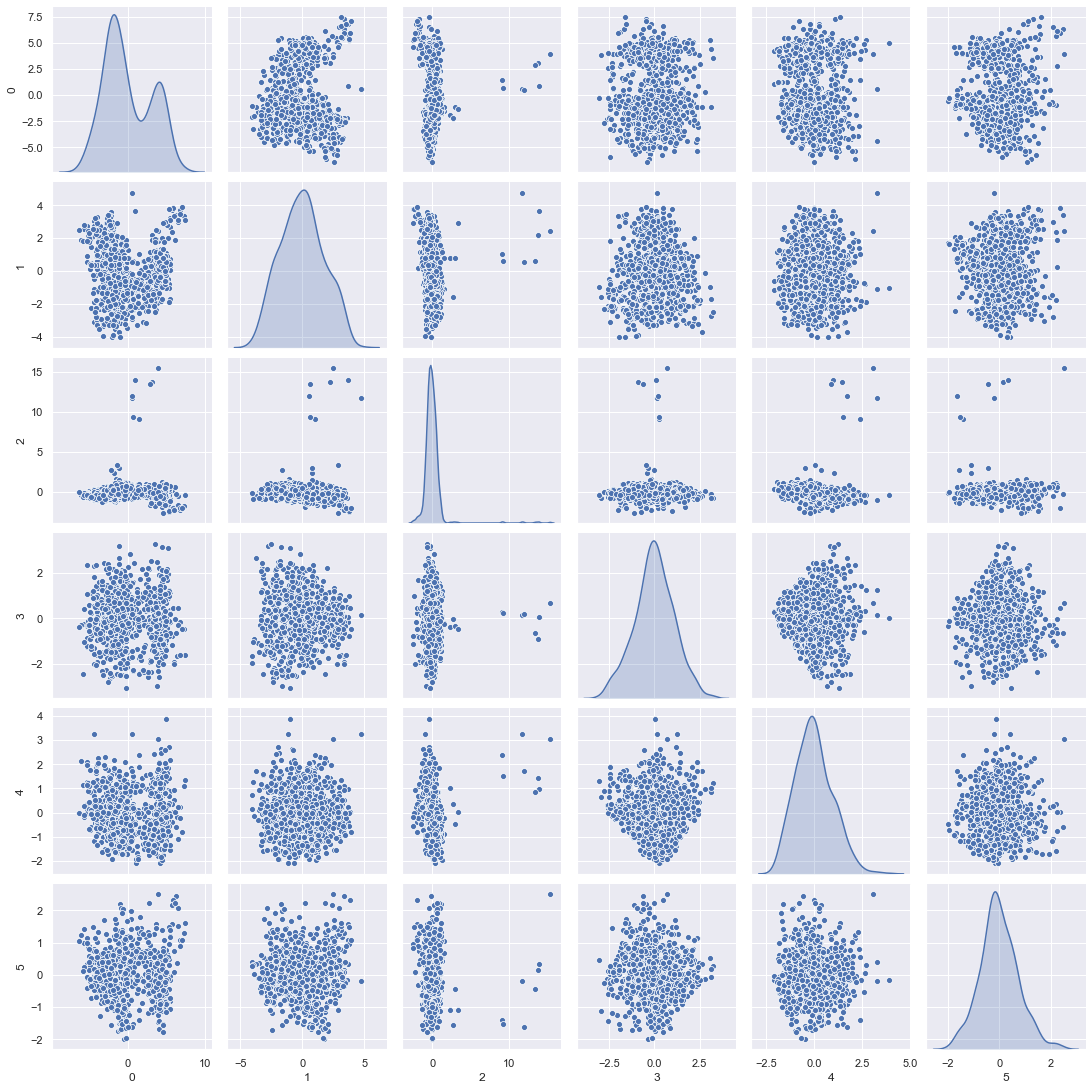

In [248]:
sns.pairplot(df_reduced, diag_kind = 'kde');

5. Classifier: Design and train a best fit SVM classier using dimensionally reduced attributes.

In [249]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca_updated, y, test_size = 0.25, random_state = 6)

In [250]:
X_train_pca.shape

(634, 6)

In [251]:
X_test_pca.shape

(212, 6)

In [252]:
Xpca_updated.shape

(846, 6)

In [253]:
y.shape

(846,)

In [254]:
# Building a Support Vector Machine on train data
svc_clf_pca = svm.SVC(gamma=0.025, C=3)   
svc_clf_pca.fit(X_train_pca, y_train_pca)

SVC(C=3, gamma=0.025)

In [255]:
pred_pca = svc_clf_pca.predict(X_train_pca)

In [256]:
pca_train_score = metrics.accuracy_score(y_train_pca, pred_pca)
pca_train_score

0.8848580441640379

In [257]:
pred_test_pca = svc_clf_pca.predict(X_test_pca)

In [258]:
pca_test_score = metrics.accuracy_score(y_test_pca, pred_test_pca)
pca_test_score

0.8962264150943396

In [259]:
print("Classification Report - after PCA with reduced Features")
print(metrics.classification_report(y_test_pca, pred_test_pca, labels=['car','bus','van']))

Classification Report - after PCA with reduced Features
              precision    recall  f1-score   support

         car       0.93      0.90      0.91       115
         bus       0.86      0.93      0.90        46
         van       0.86      0.86      0.86        51

    accuracy                           0.90       212
   macro avg       0.88      0.90      0.89       212
weighted avg       0.90      0.90      0.90       212



In [260]:
cm=metrics.confusion_matrix(y_test_pca, pred_test_pca, labels=['car','bus','van'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual_car", "Actual_bus", "Actual_van"]], 
                     columns = [i for i in ["Predict_car", "Predict_bus", "Predict_van"]])
print('')
print("Confusion Matrix - after PCA with reduced features")
df_cm


Confusion Matrix - after PCA with reduced features


,Predict_car,Predict_bus,Predict_van
Actual_car,103,5,7
Actual_bus,3,43,0
Actual_van,5,2,44


In [261]:
print("Original Data - no.of features:18")
print("Test score on the Original data", round(test_score,2)*100,'%')
print("Train score on the original data", round(train_score,2)*100,'%')
print('')
print("Reduced Features after PCA - no.of features: 6")
print("Test score on the Reduced Features after PCA", round(pca_test_score,2)*100,'%')
print("Train score on the Reduced Features after PCA", round(pca_train_score,2)*100,'%')


Original Data - no.of features:18
Test score on the Original data 98.0 %
Train score on the original data 97.0 %

Reduced Features after PCA - no.of features: 6
Test score on the Reduced Features after PCA 90.0 %
Train score on the Reduced Features after PCA 88.0 %


In [262]:
import pandas as pd
import numpy as np

In [263]:
df_vif_pca = df_reduced
vif_data_pca=pd.DataFrame()

In [264]:
vif_data_pca['Feature']=df_vif_pca.columns

In [265]:
vif_data_pca['VIF']=[variance_inflation_factor(df_vif_pca.values,i)
                        for i in range(len(df_vif_pca.columns))]

In [266]:
vif_data_pca   #VIF after PCA 

,Feature,VIF
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0


6. Conclusion: Showcase key pointer on how dimensional reduction helped in this case.

The accuracy of the original data with all the 18 features is 98% where as the accuracy of the reduced features with only 6 features after PCA is 90%.

Considering the number of features in PCA is drastically reduced from 18 to 6 with only a minor reduction in accuracy is acceptable.  

Also, In the original dataset due to the higher number of features at 18, the Variable Inflation factor (Inter-Collinearity) was noticed to be extremely high. 
After PCA, with the number of features reduced from 18 to 6, the VIF is considerally reduced and is well under 5.0

**End of Part Three**

--

## PART FOUR 

PROJECT OBJECTIVE: Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden 
patterns by using all possible methods.

The Stats listed here are "Specific" to an edition of IPL and not the overall IPL. 

Importing the data

In [267]:
df_ipl=pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')

In [268]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


In [269]:
df_ipl.shape

(180, 7)

The number of records in the data is 180, however 90 of that has null values. 

In [270]:
df_ipl.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Entire row seems to be NaN, There is no way we will be able to impute these (especially for the Name) in a meaningful way. Hence dropping off the na records. 

In [271]:
df_ipl.isna().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [272]:
df_ipl=df_ipl.dropna(axis=0)  #Dropping all Rows
df_ipl = df_ipl.reset_index(drop=True)

In [273]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.0+ KB


In [274]:
df_ipl.shape

(90, 7)

In [275]:
df_ipl.isna().sum()

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

In [276]:
df_ipl

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0
...,...,...,...,...,...,...,...
85,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0
86,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0
87,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
88,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0


EDA & Visualization

In [277]:
df_ipl.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


Few outliers can be observerd, we shall look at the data more closely and find out the details of outliers. 

Distribution of all the features

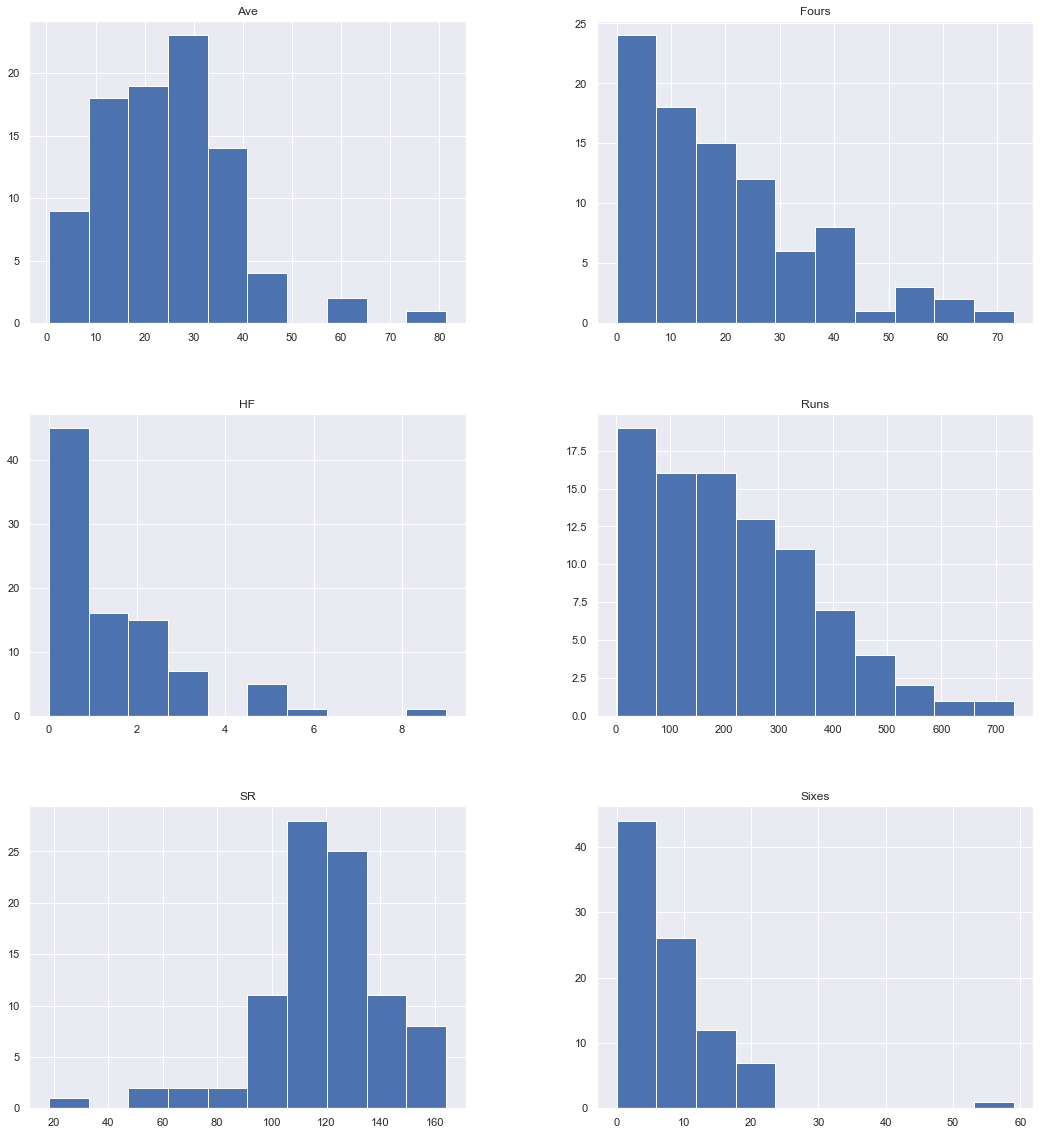

In [278]:
df_ipl.hist(figsize=(18,20));
plt.show()

Data skewness towards right can be observed

Since the dataset is about Batsman and their performance, lets visualize the data to understand the top performers @ every feature level 

Since the above graph is very cluttered, I am going to check only the Top 20 performers at every feature level going forward for better visualization. 

In [279]:
top20runs = df_ipl.groupby('Name')['Runs'].sum().sort_values(ascending = False).head(20)
top20runs = top20runs.reset_index()
top20runs.columns = ['Player Name' ,'Total Runs']

In [280]:
#top20runs

Text(0.5, 1.0, 'Top 20 Run scorers of IPL')

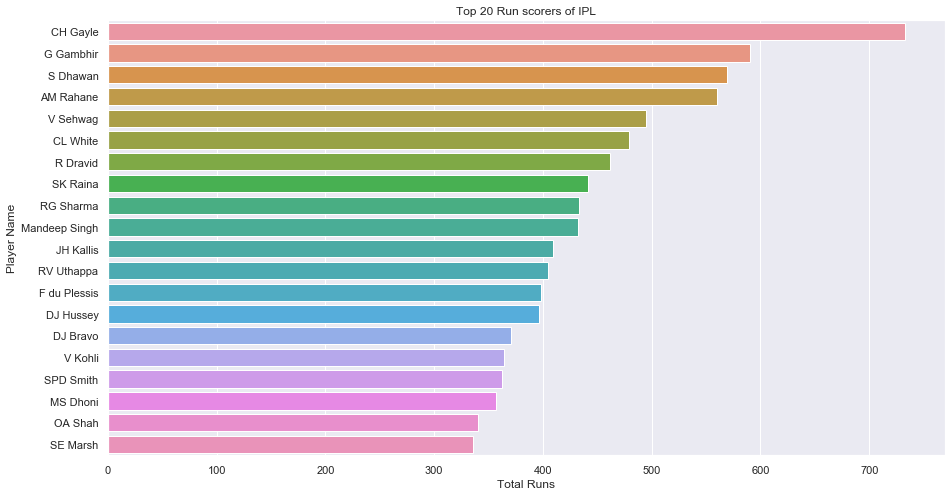

In [281]:
plt.figure(figsize=(15,8))
sns.barplot(top20runs['Total Runs'],top20runs['Player Name']).set_title("Top 20 Run scorers of IPL") #df_ipl['Runs'], df_ipl['Name'])

In [282]:
top20ave = df_ipl.groupby('Name')['Ave'].sum().sort_values(ascending = False).head(20)
top20ave = top20ave.reset_index()
top20ave.columns = ['Player Name' ,'Ave runs']

Text(0.5, 1.0, 'Top 20 Player Avg of IPL')

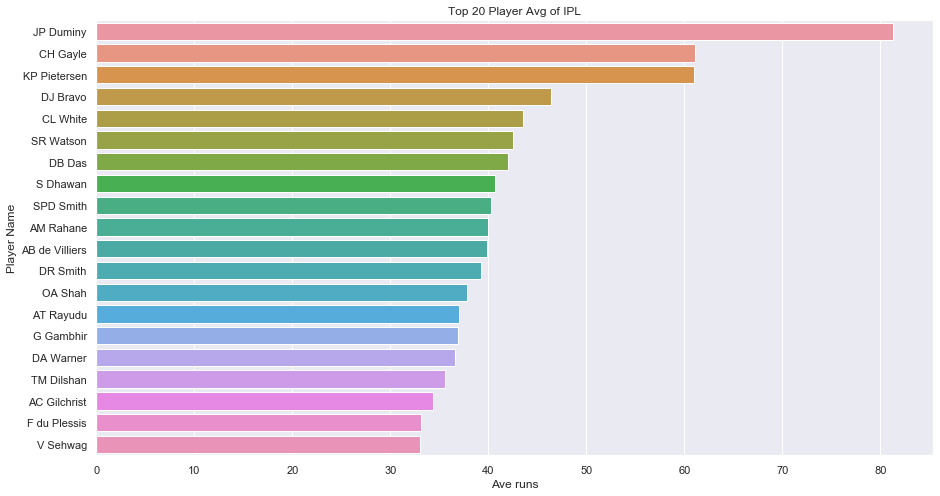

In [283]:
plt.figure(figsize=(15,8))
sns.barplot(top20ave['Ave runs'],top20ave['Player Name']).set_title("Top 20 Player Avg of IPL")

Text(0.5, 1.0, 'Top 20 Player Strike rate per 100 Balls of IPL')

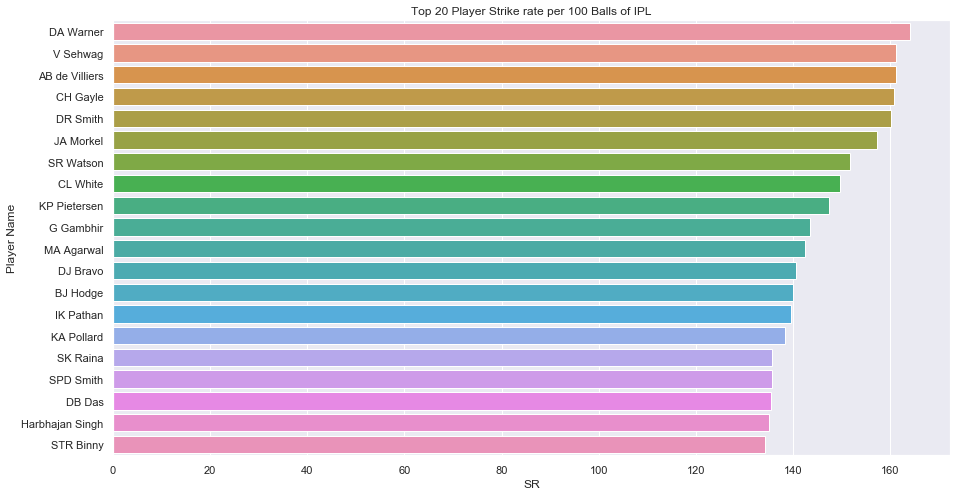

In [284]:
top20sr = df_ipl.groupby('Name')['SR'].sum().sort_values(ascending = False).head(20)
top20sr = top20sr.reset_index()
top20sr.columns = ['Player Name' ,'SR']
##
plt.figure(figsize=(15,8))
sns.barplot(top20sr['SR'],top20sr['Player Name']).set_title("Top 20 Player Strike rate per 100 Balls of IPL")

Text(0.5, 1.0, 'Top 20 Players with Max. no. of Fours in IPL')

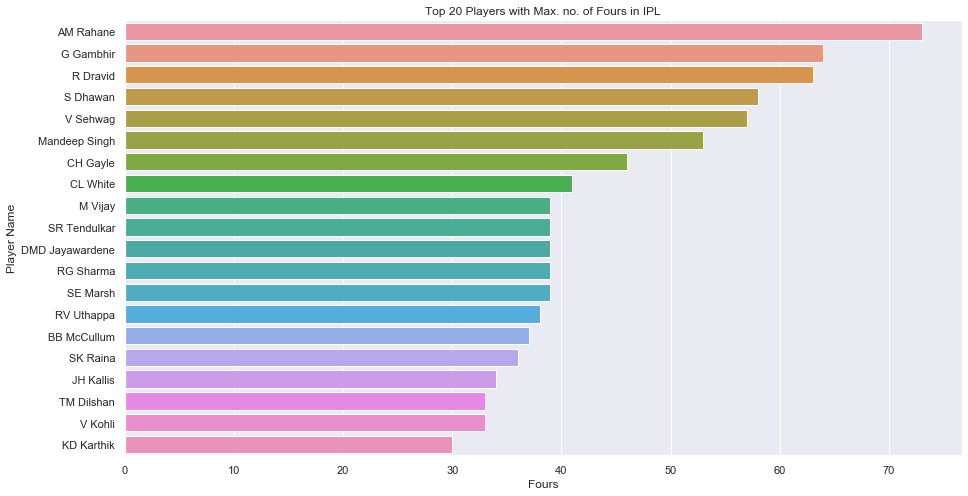

In [285]:
top20fours = df_ipl.groupby('Name')['Fours'].sum().sort_values(ascending = False).head(20)
top20fours = top20fours.reset_index()
top20fours.columns = ['Player Name' ,'Fours']
##
plt.figure(figsize=(15,8))
sns.barplot(top20fours['Fours'],top20fours['Player Name']).set_title("Top 20 Players with Max. no. of Fours in IPL")

Text(0.5, 1.0, 'Top 20 Players with Max. no. of Sixes in IPL')

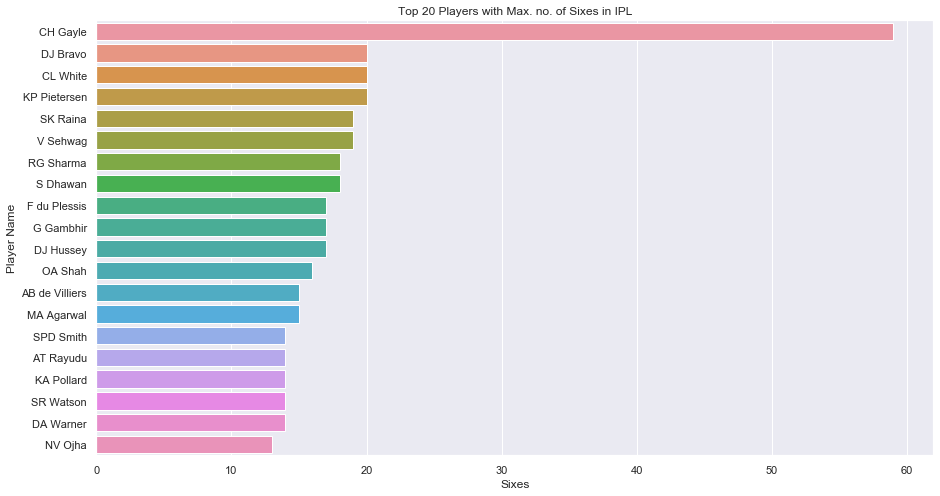

In [286]:
top20sixes = df_ipl.groupby('Name')['Sixes'].sum().sort_values(ascending = False).head(20)
top20sixes = top20sixes.reset_index()
top20sixes.columns = ['Player Name' ,'Sixes']
##
plt.figure(figsize=(15,8))
sns.barplot(top20sixes['Sixes'],top20sixes['Player Name']).set_title("Top 20 Players with Max. no. of Sixes in IPL")

Text(0.5, 1.0, 'Top 20 Players with Max. no. of Half centuries in IPL')

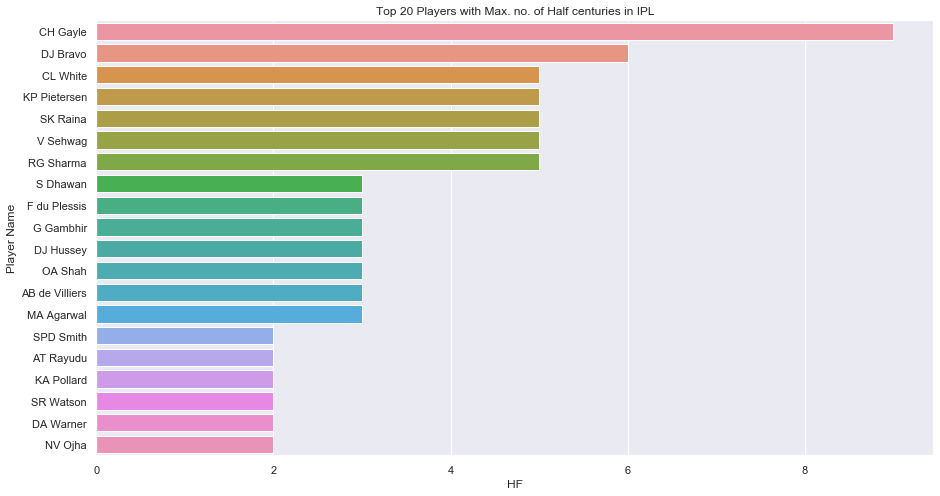

In [287]:
top2hf = df_ipl.groupby('Name')['HF'].sum().sort_values(ascending = False).head(20)
top2hf = top2hf.reset_index()
top2hf.columns = ['Player Name' ,'HF']
##
plt.figure(figsize=(15,8))
sns.barplot(top2hf['HF'],top20sixes['Player Name']).set_title("Top 20 Players with Max. no. of Half centuries in IPL")

To check for outliers in all these features

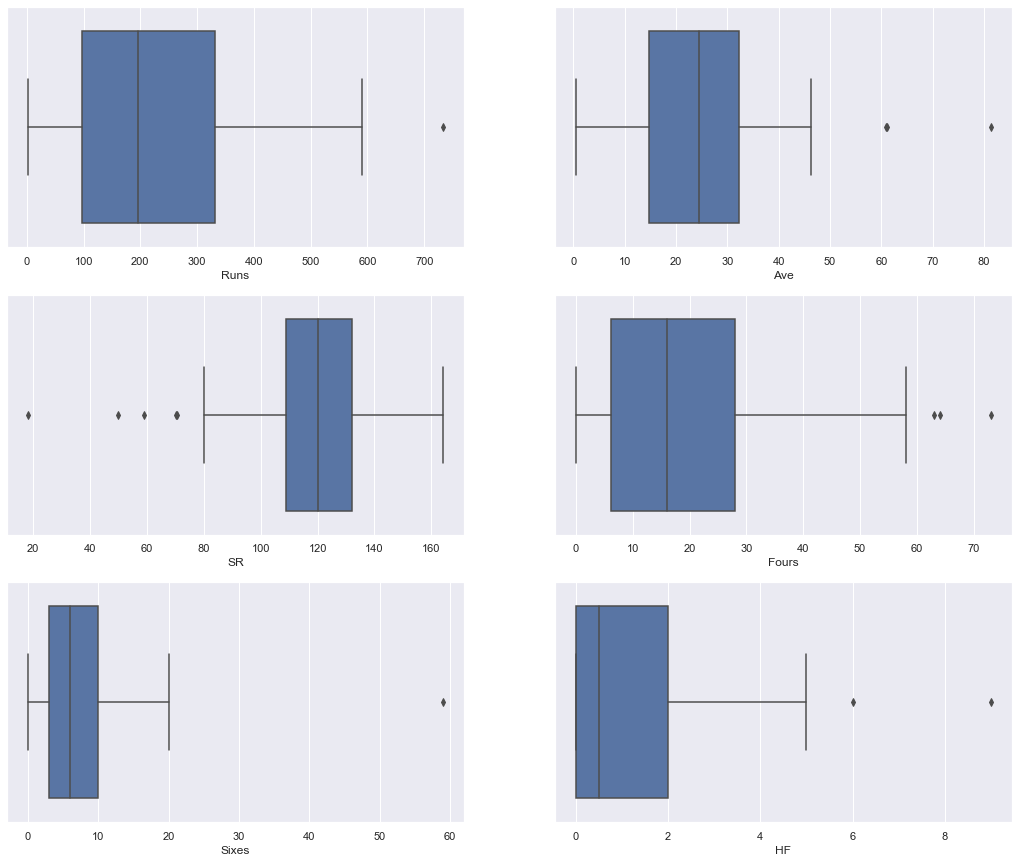

In [288]:
plt.figure(figsize=(18, 15))
col = 1  #Position of the subplot
for i in df_ipl.iloc[:,1:7].columns:
    plt.subplot(3, 2, col)
    sns.boxplot(df_ipl[i])
    col = col + 1

Observation: 

**Runs**: We noticed earlier in the Runs distribution that Chris Gayle has more runs scored than anyone by quite a distance. Hence outlier can be seen. 

**Avg**: Chris Gayle & Bravo have Avgs >60 and hence showing up as outliers. 

**SR**: Few no. of players have the SR well under the Mean. Hence many outliers on the lower end. (See below)

**Fours:** 3 players - Gambhir, Rahane and Dravid have more than 60 Fours and hence the outliers on upper end for 3. 

**Sixes:** 1 player- Chris Gayle stands out and has way more 6's than others. Hence the outlier on the upper end. 

**HF:** Only 2 players have more no of HFs than the 5. Majority are between 0s and 1s. 


In [289]:
Bottom5sr = df_ipl.groupby('Name')['SR'].sum().sort_values(ascending = True).head(5)
Bottom5sr = Bottom5sr.reset_index()
Bottom5sr.columns = ['Player Name' ,'SR']
Bottom5sr

,Player Name,SR
0,R Sharma,18.18
1,RP Singh,50.00
2,PC Valthaty,58.82
3,WD Parnell,70.37
4,Z Khan,70.58


Looking at the correlation of the Features. 

In [290]:
corr_ipl=df_ipl.iloc[:,1:7].corr()

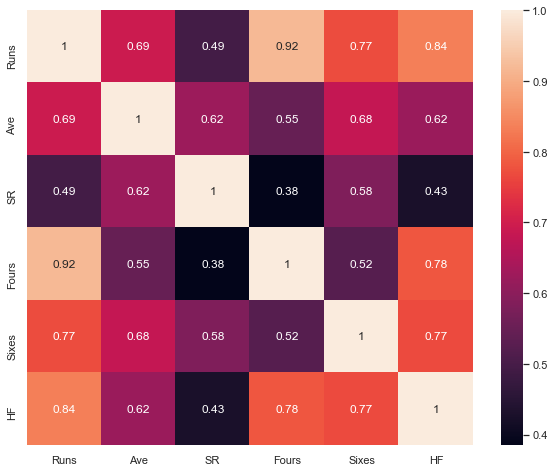

In [291]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_ipl,annot=True);

Higher degree of Correlation i.e. Inter-collinearity can be seen between columns. 
Ex: HF & Runs, HF, Ave, HF & Fours, HF & Sixes, etc.. 

2. Build a data driven model to rank all the players in the dataset using all or the most important performance features

Scaling the data for consistency/standardization before model building to identify the Performance features. 

In [292]:
ipl_num = df_ipl.iloc[:,1:7]  #Taking all the Numerical column, excluding the Name for the Clustering.  
ipl_clus = ipl_num.apply(zscore) 

In [293]:
ipl_num.shape

(90, 6)

In [294]:
ipl_num.columns

Index(['Runs', 'Ave', 'SR', 'Fours', 'Sixes', 'HF'], dtype='object')

In [295]:
ipl_clus.head()  #All the values are now standardized. 

,Runs,Ave,SR,Fours,Sixes,HF
0,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
1,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
2,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
3,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
4,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


**P C A to identify the Eigen Vectors and Values** 

In [296]:
covMatrix = np.cov(ipl_clus,rowvar=False)   #ipl_clus is the scaled data
print(covMatrix)

[[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [297]:
pca_ipl = PCA(n_components=6)
pca_ipl.fit(ipl_clus)    

PCA(n_components=6)

In [298]:
eigen_vals, eigen_vecs =np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s', eigen_vecs)
print('\n Eigen Values \n%s', eigen_vals)

Eigen Vectors 
%s [[-0.4582608  -0.26643209 -0.70483594 -0.45840889  0.10977942  0.00520142]
 [-0.39797313  0.33111756  0.0606373   0.10122837 -0.00550486 -0.84736307]
 [-0.3253838   0.69780334 -0.05624934  0.11890348  0.45013448  0.43275029]
 [-0.40574167 -0.47355804  0.58514214 -0.09676885  0.50823538  0.03252305]
 [-0.41733459  0.17902455  0.35786211 -0.39458014 -0.66942589  0.24878157]
 [-0.43237178 -0.27593225 -0.16096217  0.77486668 -0.28082541  0.17811777]]

 Eigen Values 
%s [4.30252561 0.83636692 0.01706297 0.16567829 0.41665751 0.32912443]


In [299]:
print(pca_ipl.explained_variance_ratio_)  #Variance explaination % 

[0.70911996 0.13784566 0.06867133 0.05424458 0.02730624 0.00281223]


Explained variance explains that the derived variable Z1 explains (approximately) 71% of variance, Z2 explains 14%, Z3 explains 6%, Z4 explains 5%. Z5 and Z6 are under 5% (combined). So Z5, Z6 are negligible.  

Z1 explains 70.8% of the variance, Z2 explains 13.9% &so on and so forth. Z4,Z5 & Z6 explains very little. to a level where it becomes irrelevant.

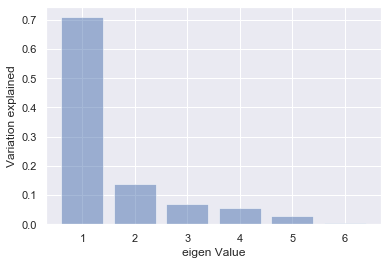

In [300]:
plt.bar(list(range(1,7)),pca_ipl.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

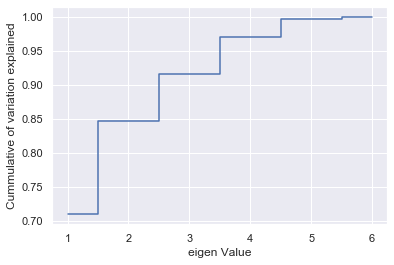

In [301]:
plt.step(list(range(1,7)),np.cumsum(pca_ipl.explained_variance_ratio_), where='mid')
plt.ylabel('Cummulative of variation explained')
plt.xlabel('eigen Value')
plt.show()

Reducing the dimensions to 4 since it explains more than 95% variances

In [302]:
pca_ipl_4 = PCA(n_components=4)
pca_ipl_4.fit(ipl_clus)
Xpca_ipl_4 = pca_ipl_4.transform(ipl_clus)

In [303]:
df_Xpca_ipl_4 = pd.DataFrame(Xpca_ipl_4,columns=['pca1_score','pca2_score','pca3_score','pca4_score'])

In [304]:
df_Xpca_ipl_4

,pca1_score,pca2_score,pca3_score,pca4_score
0,8.516774,-0.354575,3.672474,-0.996267
1,4.618340,1.476730,-0.503630,-0.594494
2,4.142251,0.471438,-0.557204,-1.101184
3,3.899411,0.041816,0.262143,-0.228085
4,4.120072,1.401002,-0.116643,-0.014712
...,...,...,...,...
85,-3.006639,0.972067,0.818102,0.129328
86,-3.000751,1.049898,0.785502,0.052754
87,-3.070959,1.463324,0.936508,0.276508
88,-3.422022,1.616542,1.246073,0.322403


In [305]:
print('Eigen value of the new PCA reduced IPL Data:', pca_ipl_4.explained_variance_) 

Eigen value of the new PCA reduced IPL Data: [4.30252561 0.83636692 0.41665751 0.32912443]


Finding out the Dot product to derive a new varaible. This variable will be used to define Player performance.  

In [306]:
df_eigen_pca4 = df_Xpca_ipl_4.dot(pca_ipl_4.explained_variance_.T)

In [307]:
df_eigen_pca4.head()  ##Dot product using the dot forumlae 

0    37.549352
1    20.700108
2    17.621845
3    16.846445
4    18.845023
dtype: float64

In [308]:
prd = df_Xpca_ipl_4 * pca_ipl_4.explained_variance_  #Alternate way for Dot product - Multiple and all all the values. 

In [309]:
prd.head()

,pca1_score,pca2_score,pca3_score,pca4_score
0,36.643639,-0.296555,1.530164,-0.327896
1,19.870524,1.235088,-0.209841,-0.195662
2,17.822139,0.394295,-0.232163,-0.362426
3,16.777316,0.034973,0.109224,-0.075068
4,17.726714,1.171752,-0.048600,-0.004842


In [310]:
perf_ind = (prd['pca1_score']+prd['pca2_score']+prd['pca3_score']+prd['pca4_score'])

In [311]:
df_perf_ind = pd.DataFrame(perf_ind)

In [312]:
df_perf_ind

,0
0,37.549352
1,20.700108
2,17.621845
3,16.846445
4,18.845023
...,...
85,-11.739703
86,-11.688061
87,-11.507797
88,-12.746019


In [313]:
df_ipl['PerformanceIndicator'] = df_perf_ind

In [314]:
df_ipl

,Name,Runs,Ave,SR,Fours,Sixes,HF,PerformanceIndicator
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,37.549352
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,20.700108
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,17.621845
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0,16.846445
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,18.845023
...,...,...,...,...,...,...,...,...
85,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0,-11.739703
86,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0,-11.688061
87,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0,-11.507797
88,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0,-12.746019


In [315]:
df_ipl.sort_values(by='PerformanceIndicator', ascending=False)

,Name,Runs,Ave,SR,Fours,Sixes,HF,PerformanceIndicator
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,37.549352
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,20.700108
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,18.845023
5,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,18.546172
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,17.621845
...,...,...,...,...,...,...,...,...
84,A Mishra,16.0,5.33,80.00,1.0,0.0,0.0,-11.574593
86,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0,-11.688061
85,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0,-11.739703
88,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0,-12.746019


**TOP 10 BATSMEN BASED ON THE PERFORMANCE INDICATOR**

In [316]:
df_ipl.sort_values(by='PerformanceIndicator', ascending=False).head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,PerformanceIndicator
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,37.549352
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,20.700108
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,18.845023
5,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,18.546172
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,17.621845
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0,16.846445
7,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,13.435535
6,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,11.810607
12,F du Plessis,398.0,33.16,130.92,29.0,17.0,3.0,9.356614
19,R Dravid,462.0,28.87,112.13,63.0,4.0,2.0,9.019157


**BOTTOM 10 BATSMEN BASED ON THE PERFORMANCE INDICATOR**

In [317]:
df_ipl.sort_values(by='PerformanceIndicator', ascending=True).head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,PerformanceIndicator
89,R Sharma,2.0,0.50,18.18,0.0,0.0,0.0,-13.776026
88,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0,-12.746019
85,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0,-11.739703
86,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0,-11.688061
84,A Mishra,16.0,5.33,80.00,1.0,0.0,0.0,-11.574593
87,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0,-11.507797
83,DW Steyn,19.0,3.80,90.47,0.0,1.0,0.0,-11.396665
81,R Ashwin,18.0,6.00,120.00,2.0,0.0,0.0,-10.517354
77,DL Vettori,31.0,7.75,119.23,3.0,1.0,0.0,-9.782538
80,RJ Peterson,32.0,10.66,106.66,3.0,1.0,0.0,-9.659779


**End of Part Four**

--

## PART FIVE

1. List down all possible dimensionality reduction techniques that can be implemented using python

Dimensionality reduction (Reduction of Input features) is essential for the following reasons:

* Removes multi-collinearity
* Improves model performance
* reduces computational time 
* visualization will be clear
* helps reduce overfitting
* storage reduction, avoids curse of dimensionality

**Possible Dimentionality reduction techniques:** 

**1) Feature Elimination** - Check if the feature is important to the Y variable. IF it is not relevant, drop the column. 
Disadvantage of Feature elimination is losing the information complete for those column. Idea is to eliminate the info that is very less significant. 

**2) Feature Extraction** - create a new variables from the X input features that way the Feature info is not lost and helps with the model building. 
Below are some of the common Dimentionality reduction techniques. 
* Principal Component Analysis (PCA)
* Missing Value Ratio
* Low Variance Filter
* High Correlation filter
* Backward Feature Elimination
* Forward Feature Selection
* Factor Analysis




2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python.

In [318]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [319]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

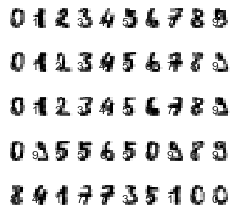

In [320]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 10, figsize=(4, 4),  #Visualizing a sample data
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.10, 0.10, str(digits.target[i]),
    transform=ax.transAxes)

In [321]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Model building...

In [322]:
import pandas as pd

In [323]:
X = pd.DataFrame(digits.data)   #Taking the data from the inbuilt dataset and that will be the Features. 

In [324]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [325]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [326]:
X.shape

(1797, 64)

All 64 Features are of Float datatype and no Nulls found. 

In [327]:
y = pd.DataFrame(digits.target)

In [328]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1797 non-null   int32
dtypes: int32(1)
memory usage: 7.1 KB


In [329]:
y.shape

(1797, 1)

In [330]:
y.head()

,0
0,0
1,1
2,2
3,3
4,4


In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

In [332]:
X_train.shape

(1347, 64)

In [333]:
X_test.shape

(450, 64)

In [334]:
y_train.shape

(1347, 1)

In [335]:
y_test.shape

(450, 1)

In [336]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

C:\Users\Ranga\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [337]:
NB_before_PCA_testscore = accuracy_score(y_test, pred)
NB_before_PCA_testscore

0.8622222222222222

Test score using Gaussian NB: 86%

In [338]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.95) + 1

From 64 features, we are going to 28. With these 28 features we are able to cover the 95% data variances. 

In [339]:
X_train.shape

(1347, 64)

In [340]:
pca = PCA(n_components=28)
X_reduced = pca.fit_transform(X_train)  #Reduced features. 
X_recovered = pca.inverse_transform(X_reduced)

In [341]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (1347, 28)
recovered shape: (1347, 64)


In [342]:
model.fit(X_reduced, y_train)

C:\Users\Ranga\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [343]:
X_test_reduced = pca.transform(X_test)

In [344]:
y_hat_reduced = model.predict(X_test_reduced)

In [345]:
X_test_reduced.shape

(450, 28)

In [346]:
y_hat_reduced.shape

(450,)

In [347]:
pca_reduced_testscore = accuracy_score(y_test, y_hat_reduced)
pca_reduced_testscore

0.94

In [348]:
y_test_ary = np.array(y_test)

In [349]:
df_output = pd.DataFrame(y_test_ary, columns =['original-y_test'])

In [350]:
df_output['NB Classifier-y_pred (with 64 Features)'] = pred

In [351]:
df_output['PCA altered-y_pred (with 28 Features)'] = y_hat_reduced

In [352]:
df_output.head()

,original-y_test,NB Classifier-y_pred (with 64 Features),PCA altered-y_pred (with 28 Features)
0,1,1,1
1,9,9,9
2,6,6,6
3,0,0,0
4,8,8,8


Below are the list of values where prediction from PCA altered (reduced features) is same as the original y_test & 
SM classifier y-prediction (64 features) is incorrect. 

Taking sample 10

In [353]:
df_output[(df_output['NB Classifier-y_pred (with 64 Features)'] != df_output['PCA altered-y_pred (with 28 Features)'])
& (df_output['PCA altered-y_pred (with 28 Features)'] == df_output['original-y_test'])].head(10)

,original-y_test,NB Classifier-y_pred (with 64 Features),PCA altered-y_pred (with 28 Features)
12,2,1,2
19,3,8,3
21,2,8,2
31,2,8,2
46,4,7,4
60,4,7,4
84,8,3,8
91,9,5,9
111,4,0,4
134,9,0,9


In [354]:
df_output[(df_output['NB Classifier-y_pred (with 64 Features)'] != df_output['PCA altered-y_pred (with 28 Features)'])
& (df_output['PCA altered-y_pred (with 28 Features)'] == df_output['original-y_test'])].count()

original-y_test                            43
NB Classifier-y_pred (with 64 Features)    43
PCA altered-y_pred (with 28 Features)      43
dtype: int64

In [355]:
print("Test score of the model with 64 Features(before PCA):", round(NB_before_PCA_testscore,2))
print("Test score of the model with 28 Features(after PCA):", round(pca_reduced_testscore,2))

Test score of the model with 64 Features(before PCA): 0.86
Test score of the model with 28 Features(after PCA): 0.94


**End of Part Five**